<a href="https://colab.research.google.com/github/BhoomikaLohana/Banking-Fraud-Detection-Using-Machine-Learning-Algorithm/blob/main/Bank_fraud_Detection_and_Transaction_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bank fraud Detection and Transaction Analysis**

In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
#Load Data
df=pd.read_csv("/content/bank_transactions_data_2.csv")
df.head()

TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor                   81              1   
1           68             Doctor                  141              1   
2           19            Student                   56              1   
3           26            Student                   25              1   
4           26            Student                  198              1   

   AccountBalance PreviousTransactionDate  
0         5112.21     2024-11-04 08:08:08  
1        13758.91     2024-11-04 08:09:35  
2         1122.35     2024-11-04 08:07:04  
3         8569.06     2024-11-04 08:09:06  
4         7429.40     2024-11-04 08:06:39

In [ ]:
#Structure of data
print(df.shape)

#Structure and types of data
df.info()

#Summary Statistics for numerical columns
df.describe()

(2512, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalanc

TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2512.000000  2512.000000          2512.000000    2512.000000   
mean          297.593778    44.673965           119.643312       1.124602   
std           291.946243    17.792198            69.963757       0.602662   
min             0.260000    18.000000            10.000000       1.000000   
25%            81.885000    27.000000            63.000000       1.000000   
50%           211.140000    45.000000           112.500000       1.000000   
75%           414.527500    59.000000           161.000000       1.000000   
max          1919.110000    80.000000           300.000000       5.000000   

       AccountBalance  
count     2512.000000  
mean      5114.302966  
std       3900.942499  
min        101.250000  
25%       1504.370000  
50%       4735.510000  
75%       7678.820000  
max      14977.990000

## **Data Cleaning**

In [ ]:
#Checking Missing values
print("Missing values:\n",df.isnull().sum())

Missing values:
 TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


In [ ]:
# Convert columns to datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'],format='%Y-%m-%d %H:%M:%S')
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'],format='%Y-%m-%d %H:%M:%S')
print(df.dtypes)

TransactionID                      object
AccountID                          object
TransactionAmount                 float64
TransactionDate            datetime64[ns]
TransactionType                    object
Location                           object
DeviceID                           object
IP Address                         object
MerchantID                         object
Channel                            object
CustomerAge                         int64
CustomerOccupation                 object
TransactionDuration                 int64
LoginAttempts                       int64
AccountBalance                    float64
PreviousTransactionDate    datetime64[ns]
dtype: object


---


# **Exploratory Data Analysis(EDA)**

---

**1. Univariate Analysis**

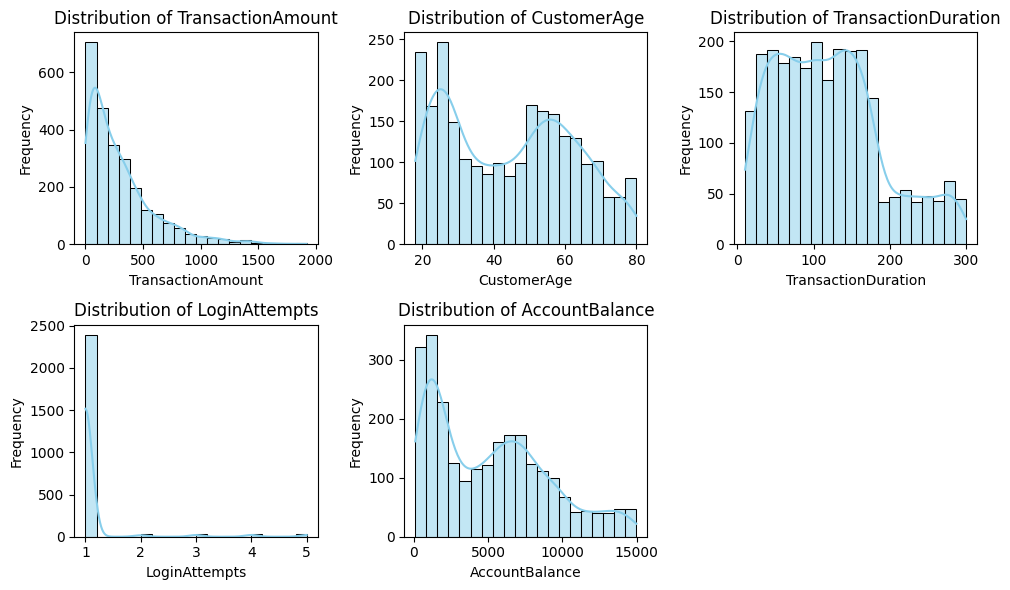

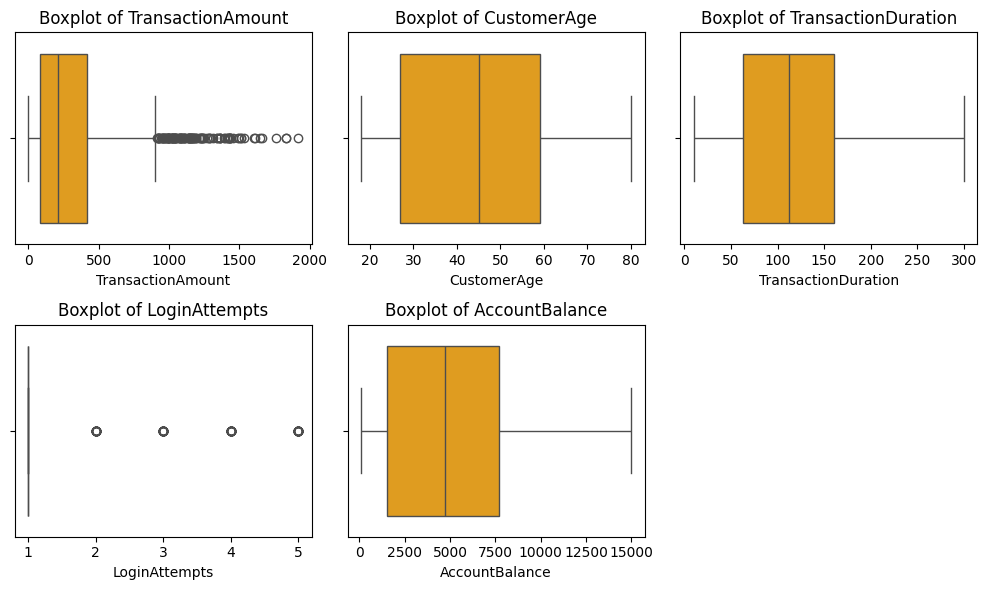

In [ ]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Histogram and Box plot for all numerical columns
plt.figure(figsize=(10, 6))
num_cols = len(numerical_columns)
rows = (num_cols // 3) + (num_cols % 3 > 0)

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(rows, 3, i)
    sns.histplot(df[col], kde=True, bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(rows, 3, i)  # Create subplots
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

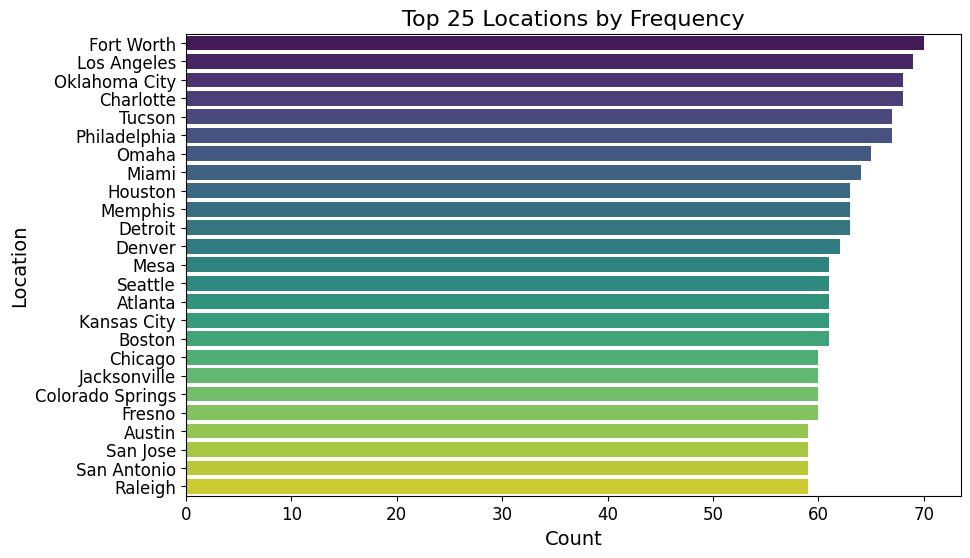

Number of unique values in 'Location': 43


In [ ]:
# Top 25 locations
top_n = 25
top_locations = df['Location'].value_counts().nlargest(top_n).index

# Filter data for top locations
filtered_data = df[df['Location'].isin(top_locations)]

# Countplot for top locations
plt.figure(figsize=(10, 6))
sns.countplot(y=filtered_data['Location'], order=filtered_data['Location'].value_counts().index, palette='viridis')
plt.title(f'Top {top_n} Locations by Frequency', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Location', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

unique_locations = df['Location'].nunique()
print(f"Number of unique values in 'Location': {unique_locations}")

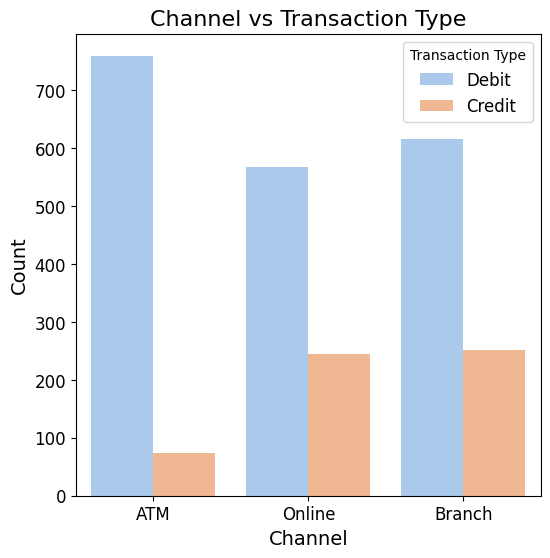

In [ ]:
# Double bar graph for 'Channel' and 'TransactionType'
plt.figure(figsize=(6, 6))
sns.countplot(x='Channel', hue='TransactionType', data=df, palette='pastel')
plt.title('Channel vs Transaction Type', fontsize=16)
plt.xlabel('Channel', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Transaction Type', fontsize=12)

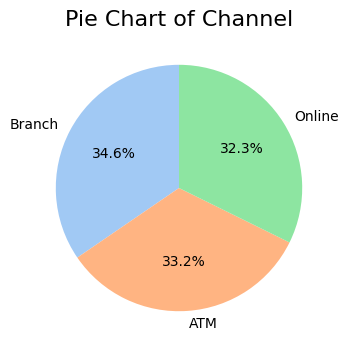

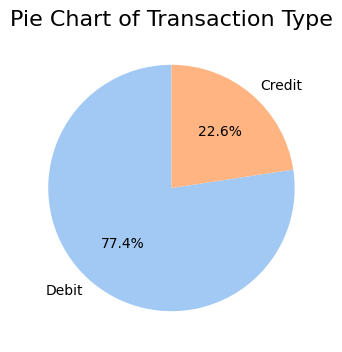

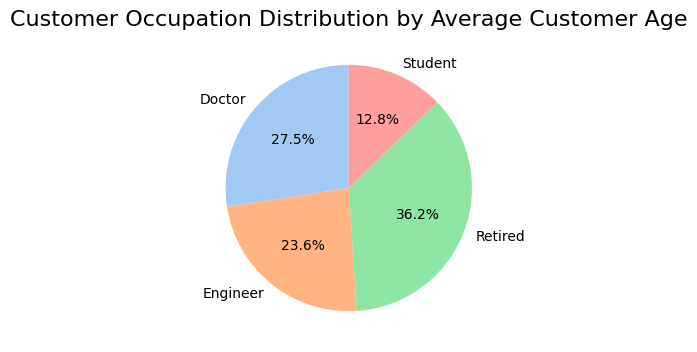

In [ ]:
# Pie chart for 'Channel'
plt.figure(figsize=(6,4))
df['Channel'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Pie Chart of Channel', fontsize=16)
plt.ylabel('')
plt.show()

# Pie chart for 'TransactionType'
plt.figure(figsize=(6,4))
df['TransactionType'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Pie Chart of Transaction Type', fontsize=16)
plt.ylabel('')
plt.show()

# Pie chart for 'CustomerOccupation' with respect to 'CustomerAge'
plt.figure(figsize=(6,4))
df.groupby('CustomerOccupation')['CustomerAge'].mean().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Customer Occupation Distribution by Average Customer Age', fontsize=16)
plt.ylabel('')
plt.show()

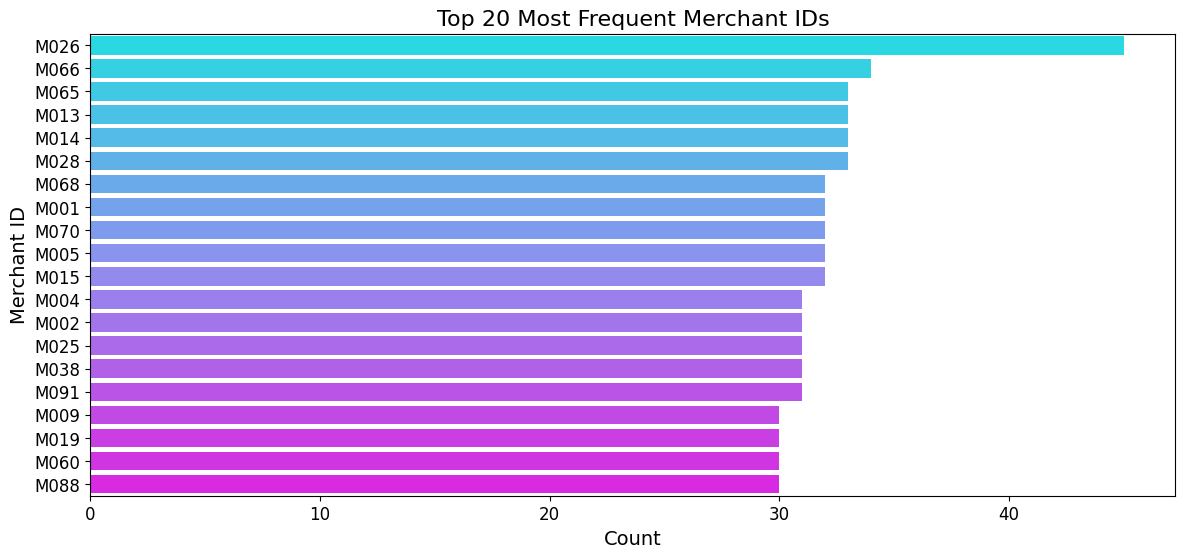

Number of unique values in 'MerchantID': 100


In [ ]:
# Countplot for top 20 most frequent 'MerchantID'
top_20_merchants = df['MerchantID'].value_counts().head(20).index
plt.figure(figsize=(14, 6))
sns.countplot(y=df[df['MerchantID'].isin(top_20_merchants)]['MerchantID'], order=top_20_merchants, palette='cool')
plt.title('Top 20 Most Frequent Merchant IDs', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Merchant ID', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
unique_MerID = df['MerchantID'].nunique()
print(f"Number of unique values in 'MerchantID': {unique_MerID}")

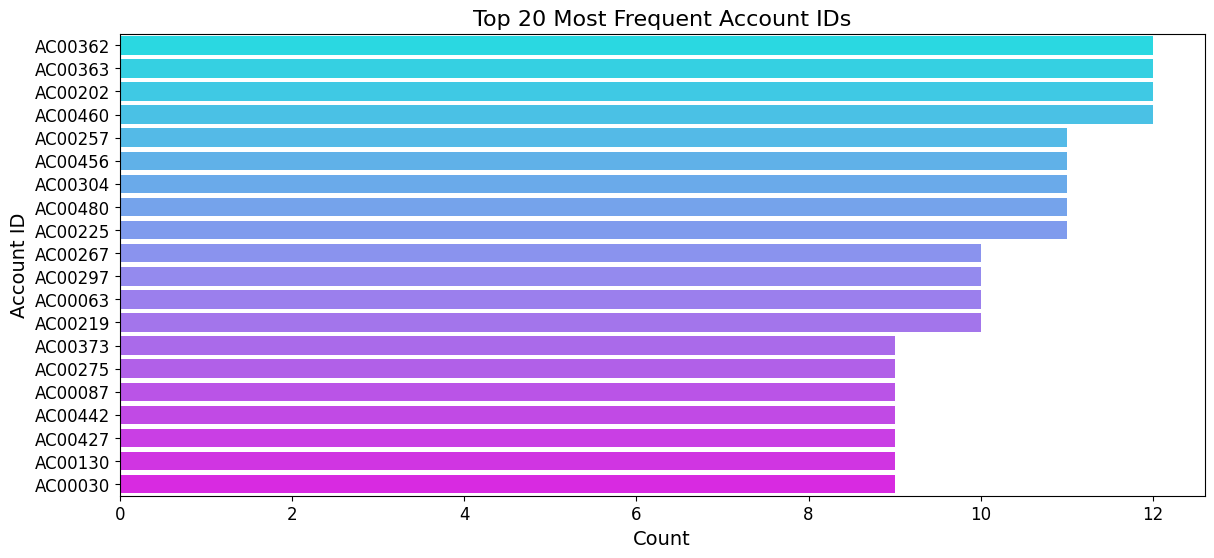

Number of unique values in 'AccountID': 495


In [ ]:
# Countplot for top 20 most frequent 'AccountID'
top_20_accounts = df['AccountID'].value_counts().head(20).index
plt.figure(figsize=(14, 6))
sns.countplot(y=df[df['AccountID'].isin(top_20_accounts)]['AccountID'], order=top_20_accounts, palette='cool')
plt.title('Top 20 Most Frequent Account IDs', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Account ID', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
Unique_AccID=df['AccountID'].nunique()
print(f"Number of unique values in 'AccountID': {Unique_AccID}")

Correlation Matrix:
                     TransactionAmount  CustomerAge  TransactionDuration  \
TransactionAmount             1.000000    -0.025616             0.004359   
CustomerAge                  -0.025616     1.000000            -0.017936   
TransactionDuration           0.004359    -0.017936             1.000000   
LoginAttempts                -0.008445     0.007653             0.032639   
AccountBalance               -0.025165     0.319942             0.005577   

                     LoginAttempts  AccountBalance  
TransactionAmount        -0.008445       -0.025165  
CustomerAge               0.007653        0.319942  
TransactionDuration       0.032639        0.005577  
LoginAttempts             1.000000        0.014999  
AccountBalance            0.014999        1.000000  


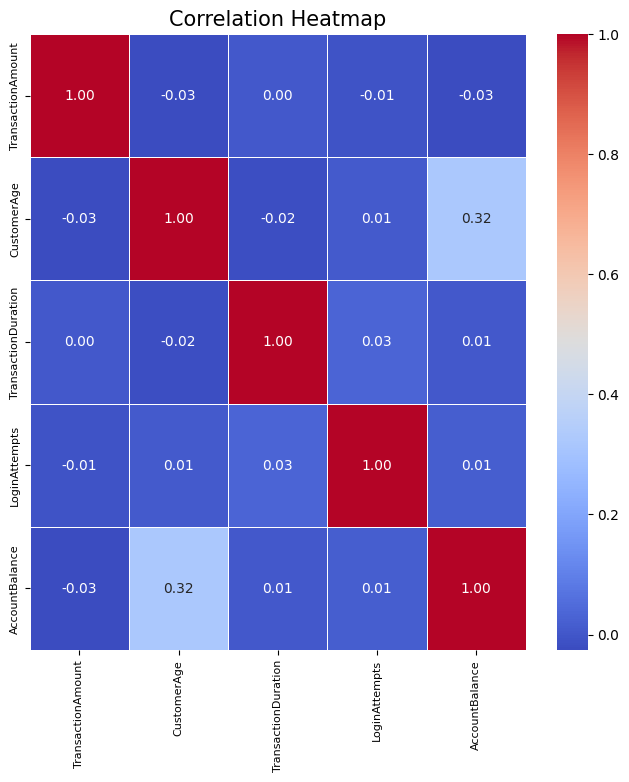

In [ ]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numerical_columns.corr()

# Verify the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plot the heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=15)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()


# **2. Bivariate Analysis**

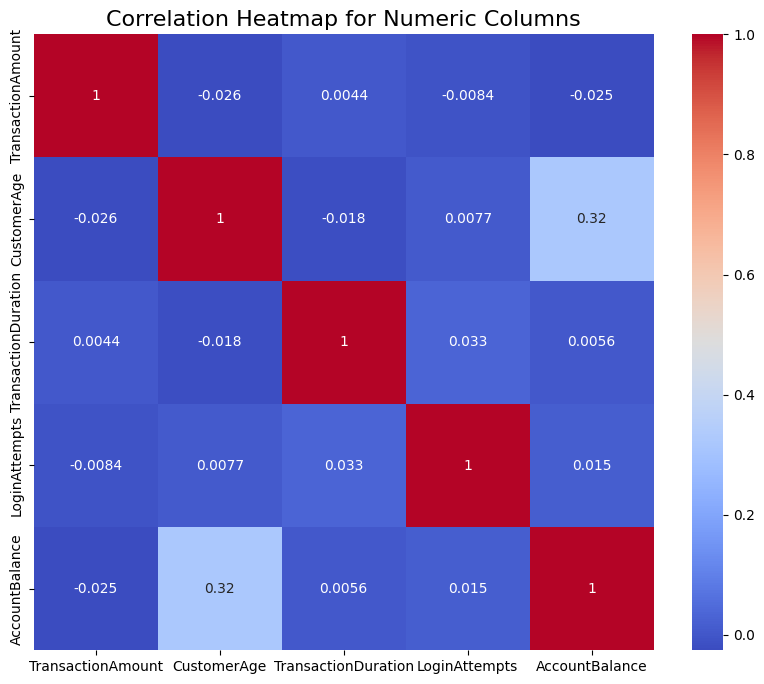

In [ ]:
# Define numeric and categorical columns
numeric_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
categorical_cols = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']

# 1. Correlation Heatmap for Numeric Columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Numeric Columns', fontsize=16)
plt.show()



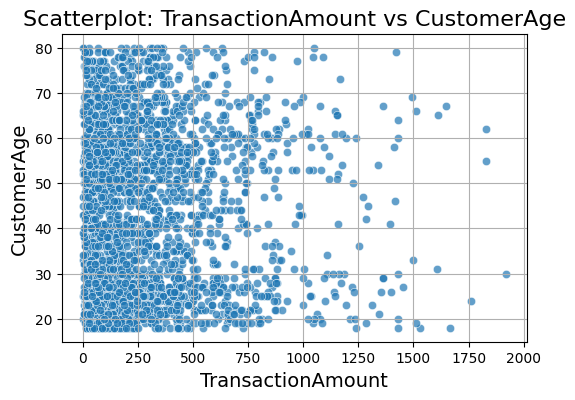

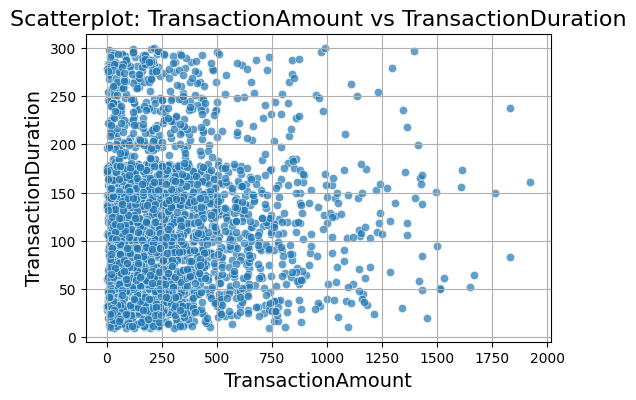

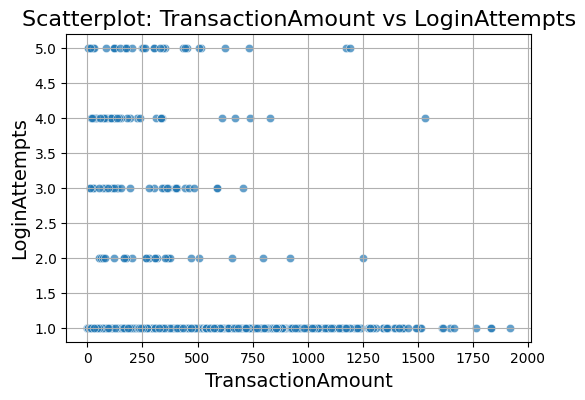

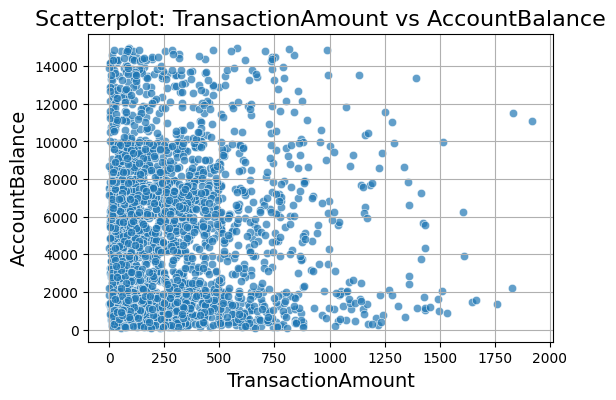

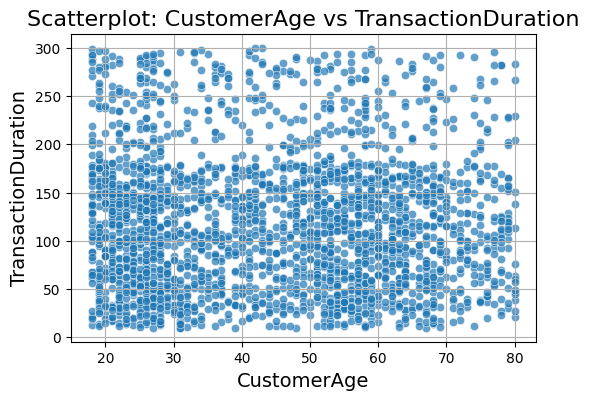

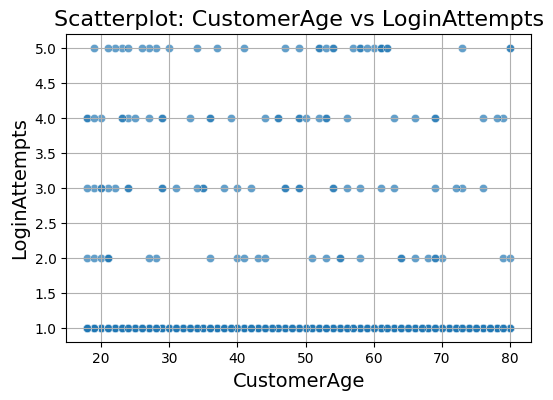

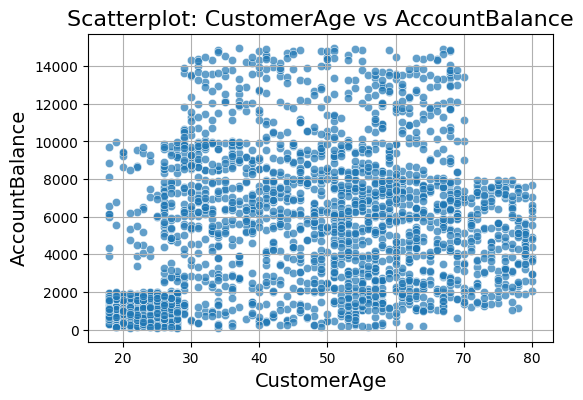

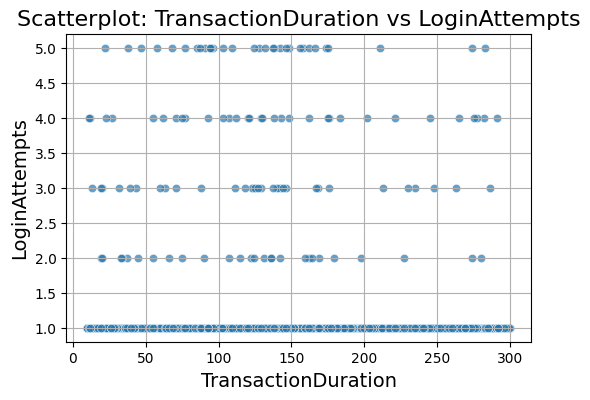

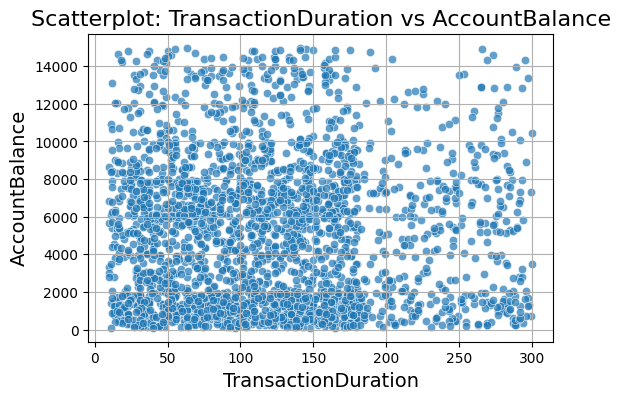

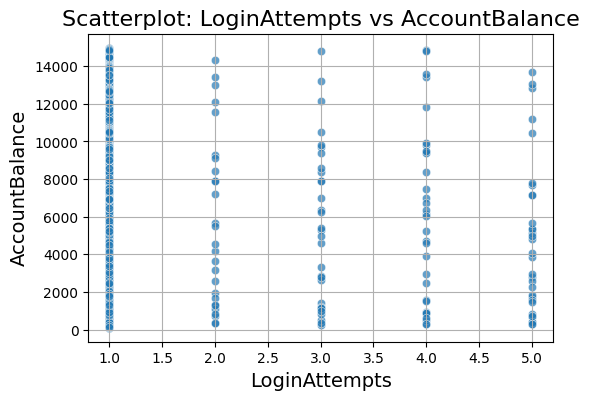

In [ ]:
# 2. Scatterplots for Numeric vs Numeric
for i, col1 in enumerate(numeric_cols):
    for col2 in numeric_cols[i+1:]:
        plt.figure(figsize=(6,4))
        sns.scatterplot(x=df[col1], y=df[col2], alpha=0.7)
        plt.title(f'Scatterplot: {col1} vs {col2}', fontsize=16)
        plt.xlabel(col1, fontsize=14)
        plt.ylabel(col2, fontsize=14)
        plt.grid(True)
        plt.show()

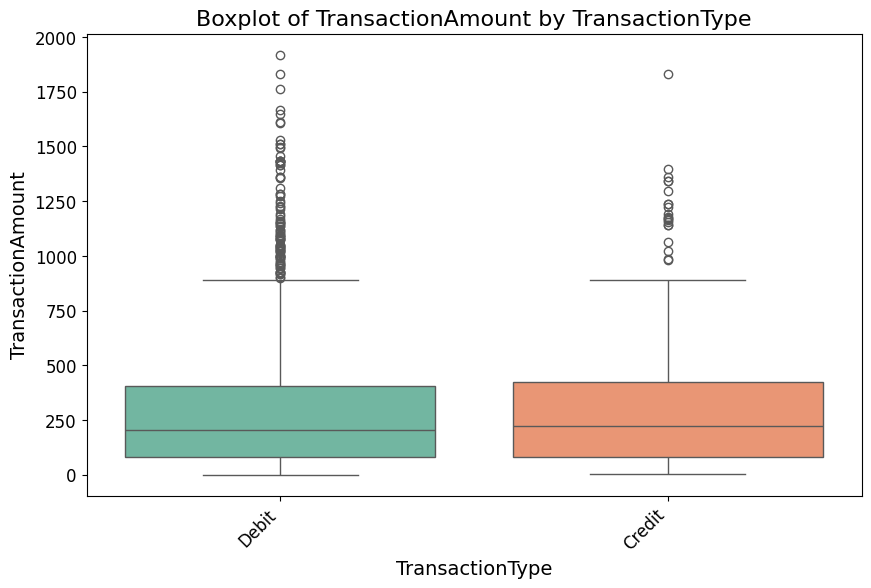

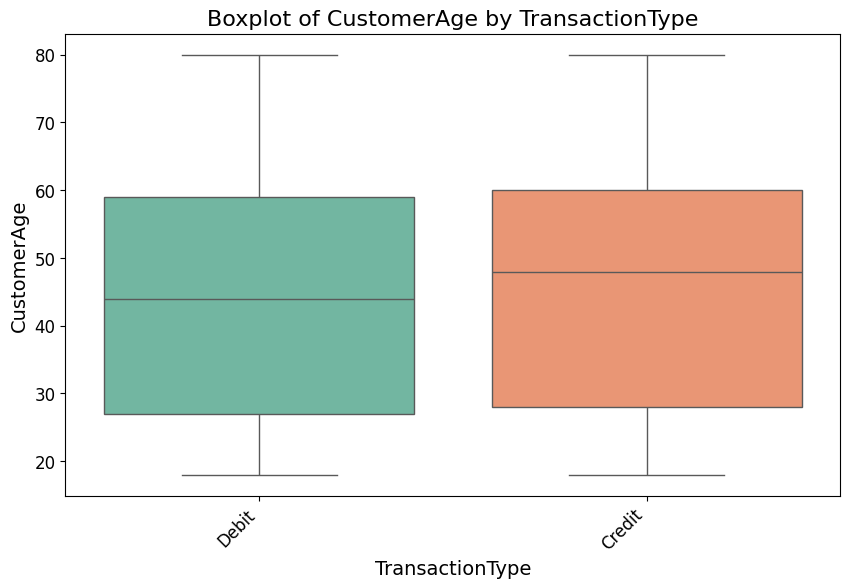

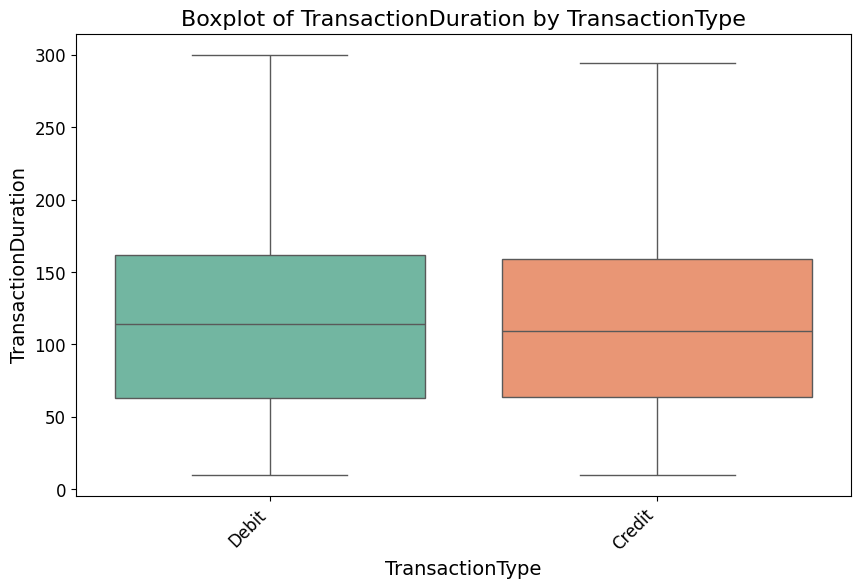

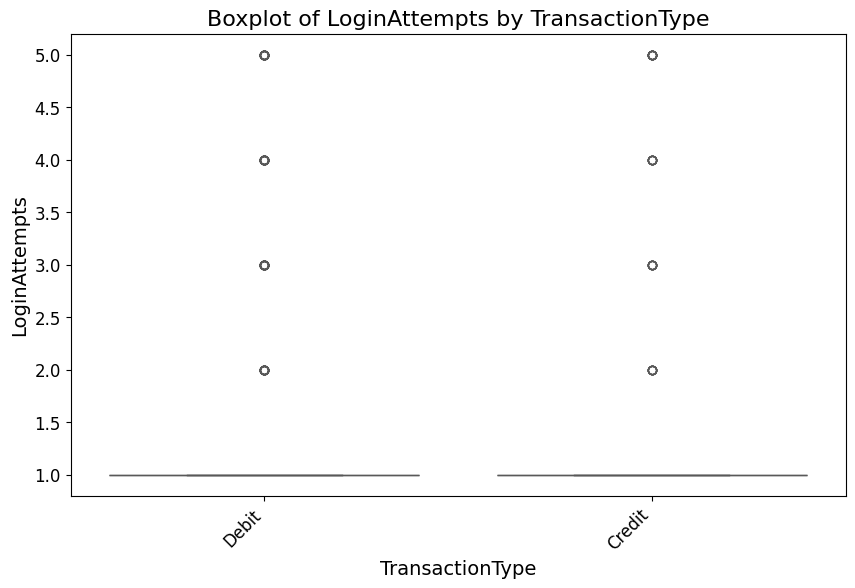

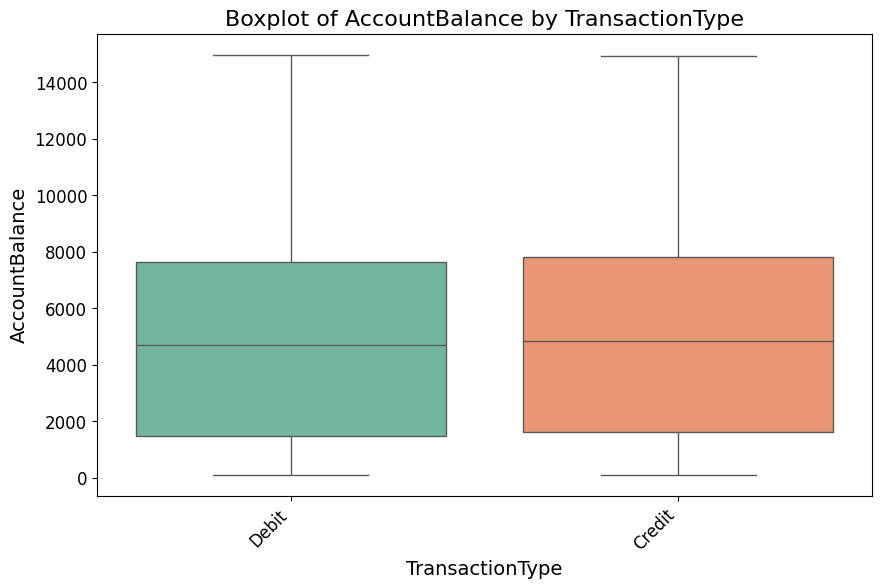

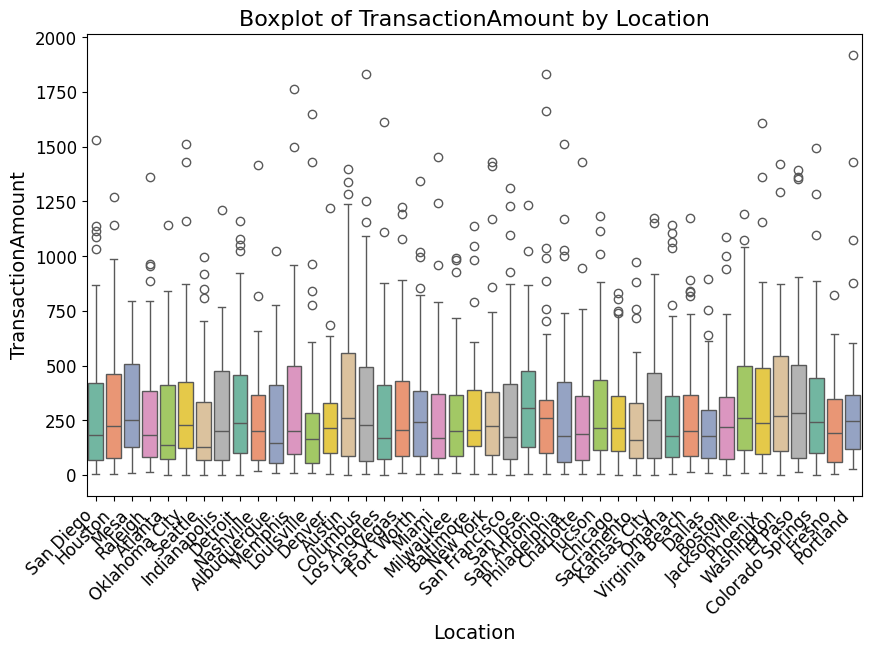

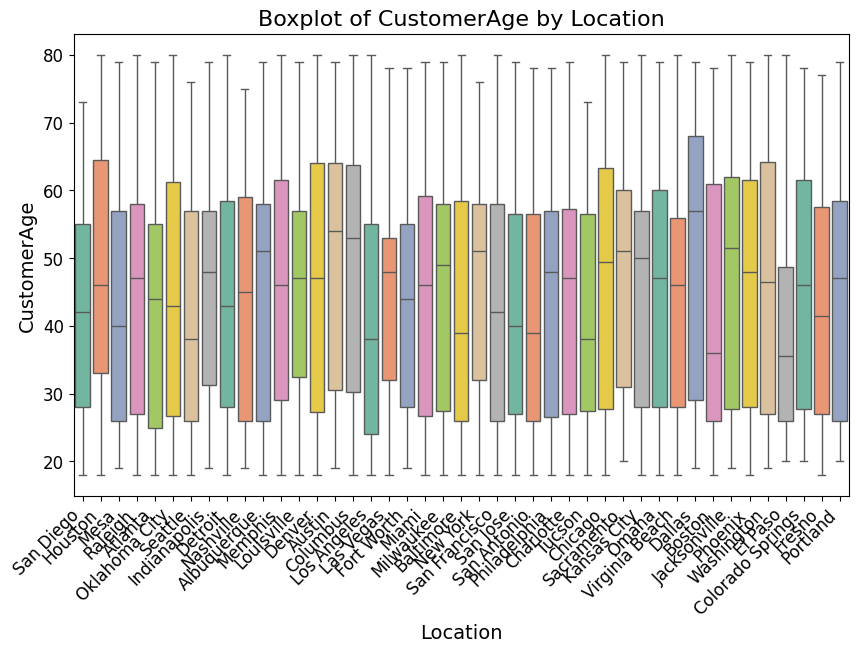

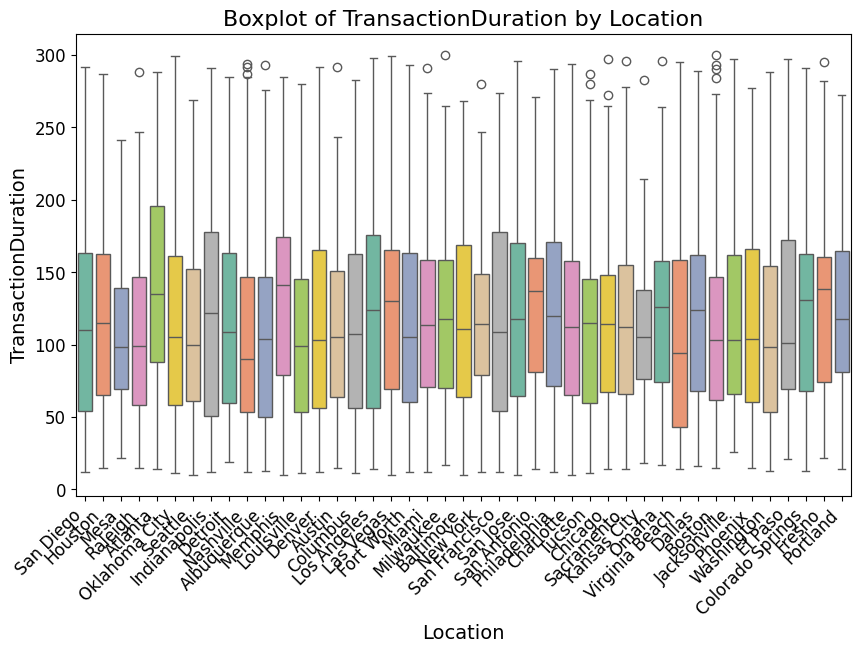

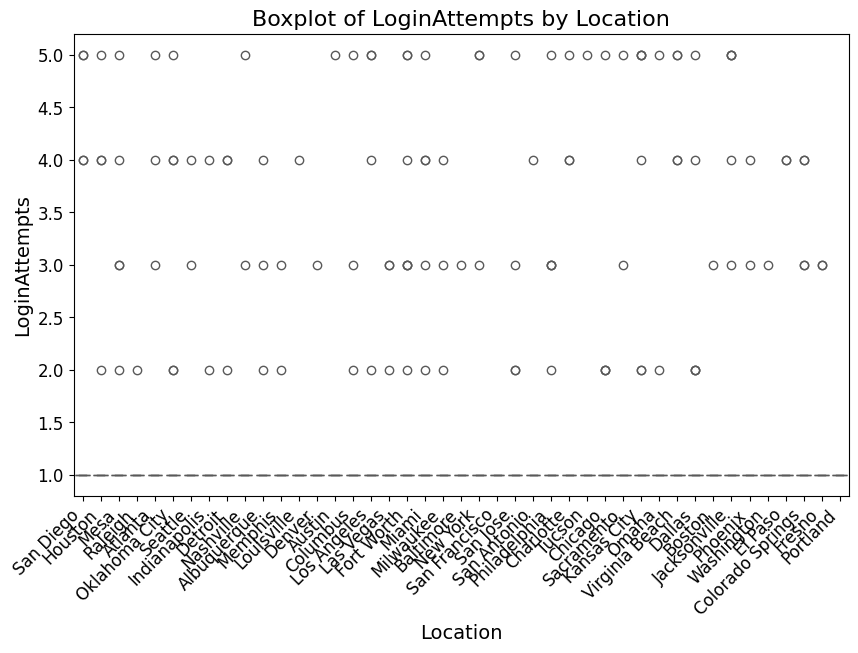

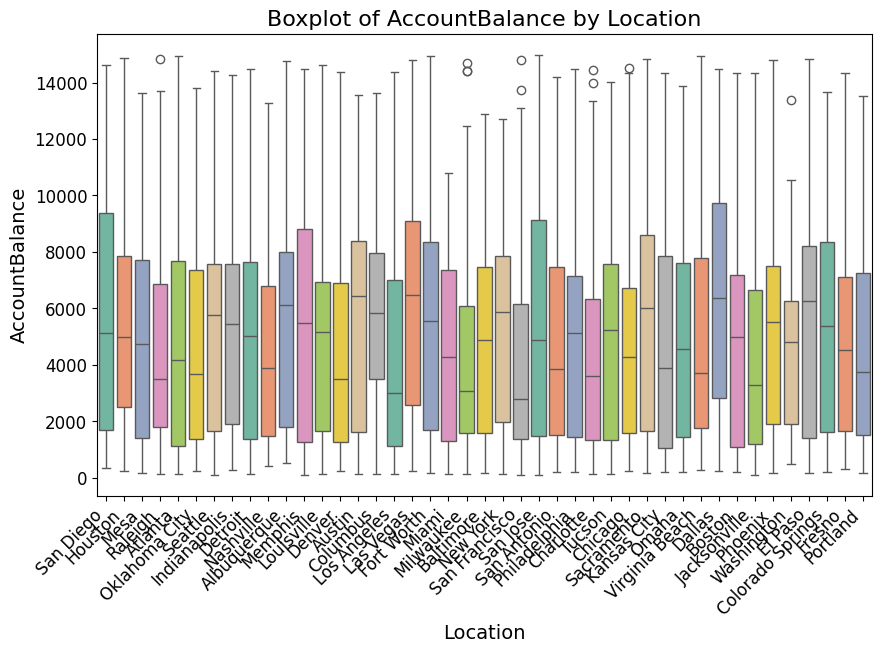

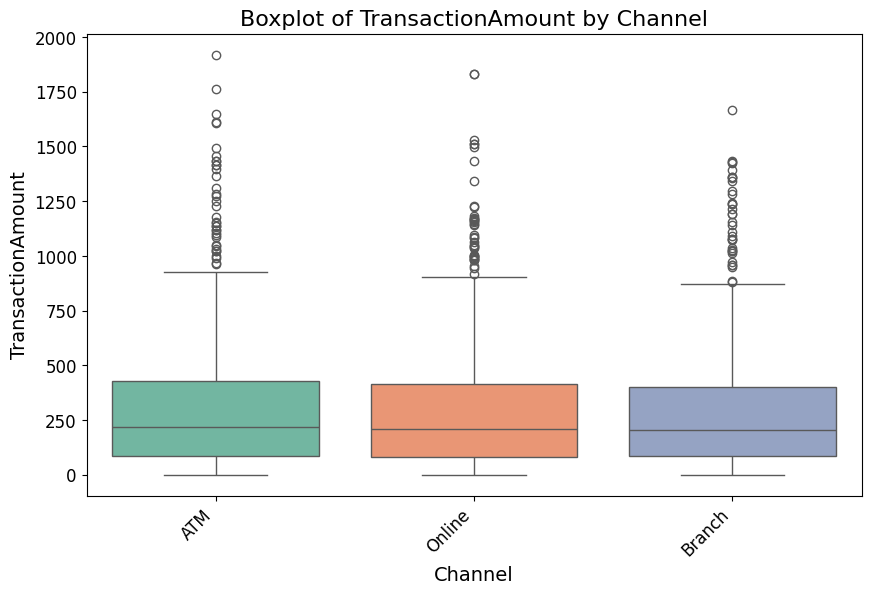

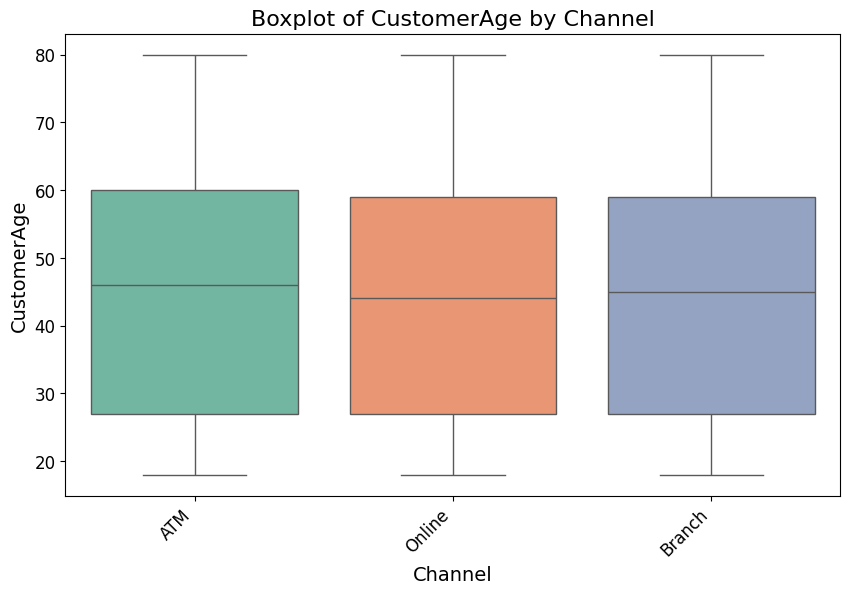

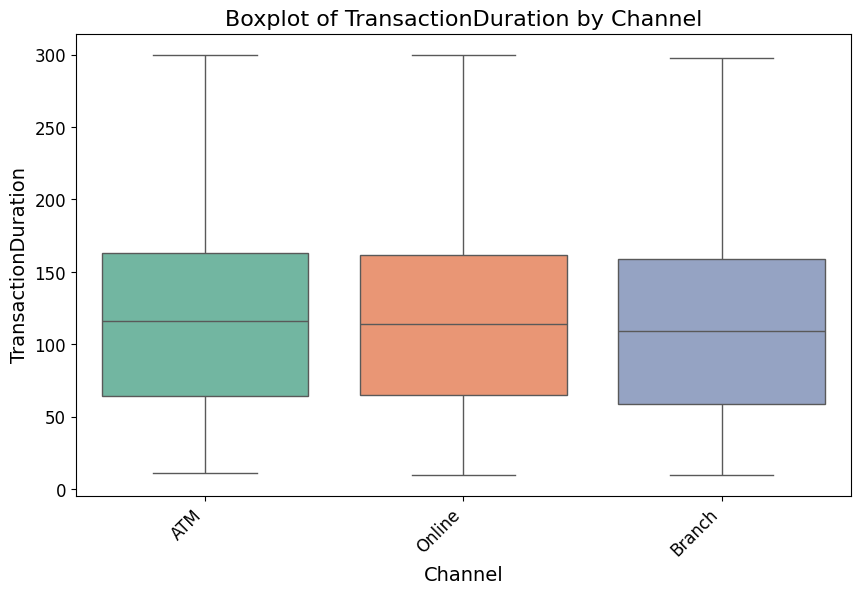

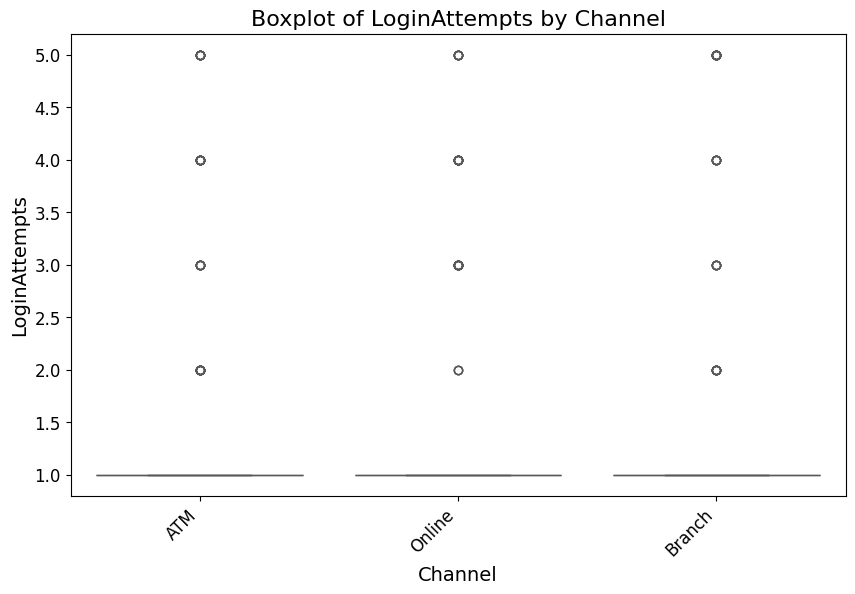

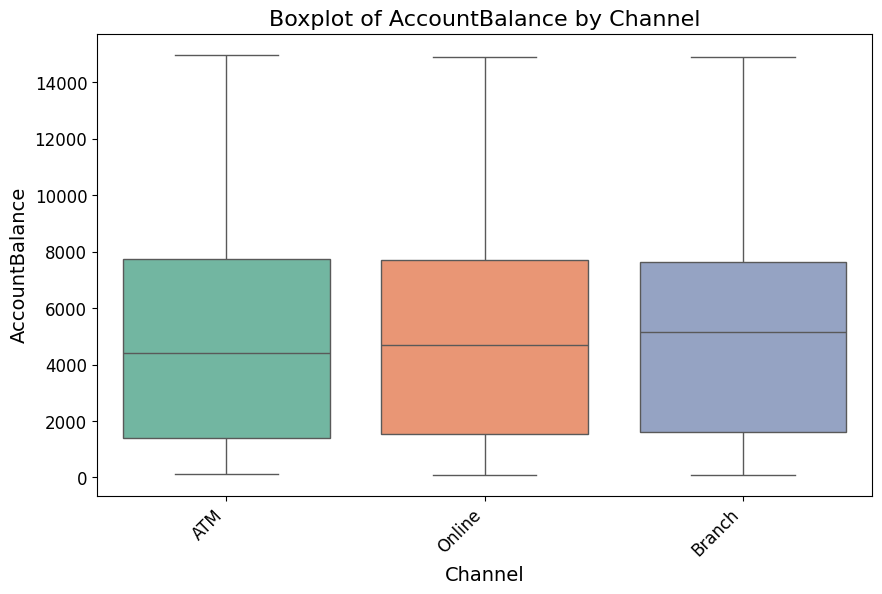

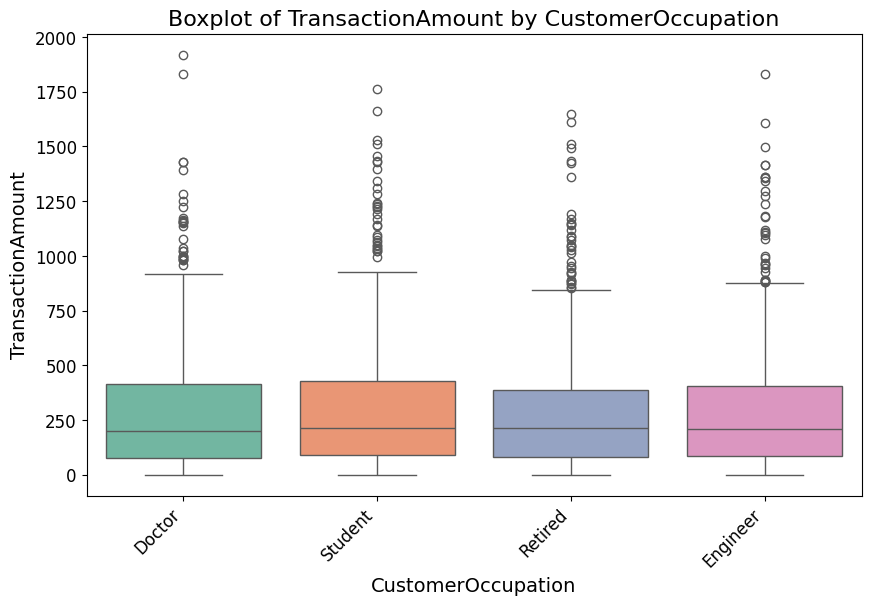

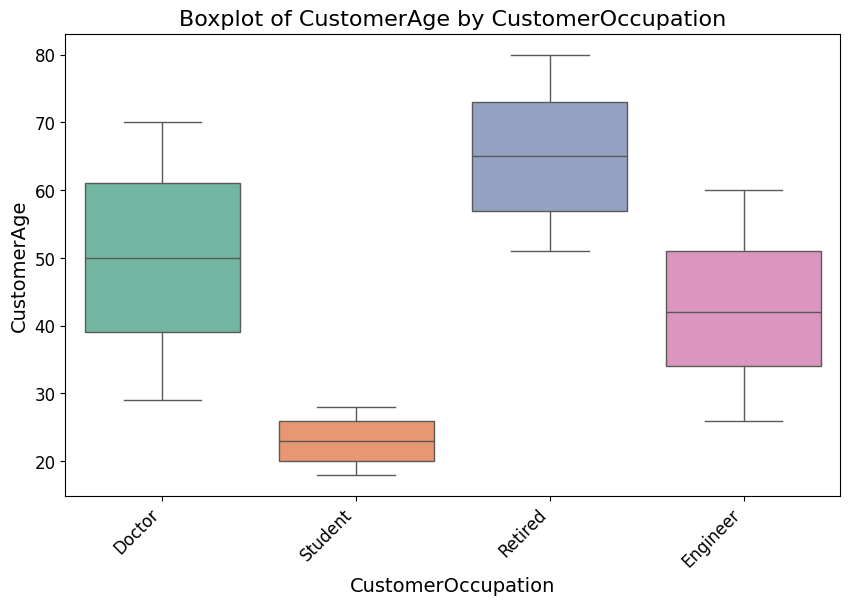

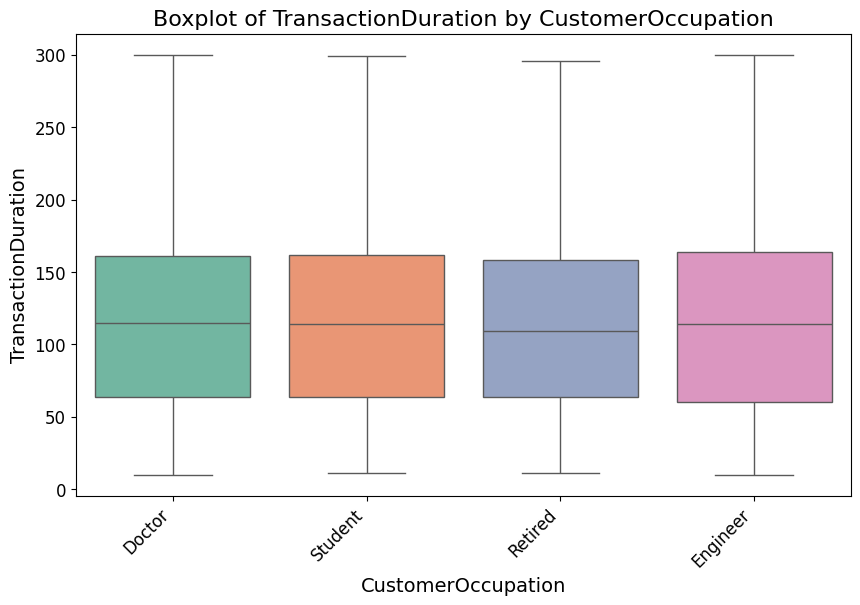

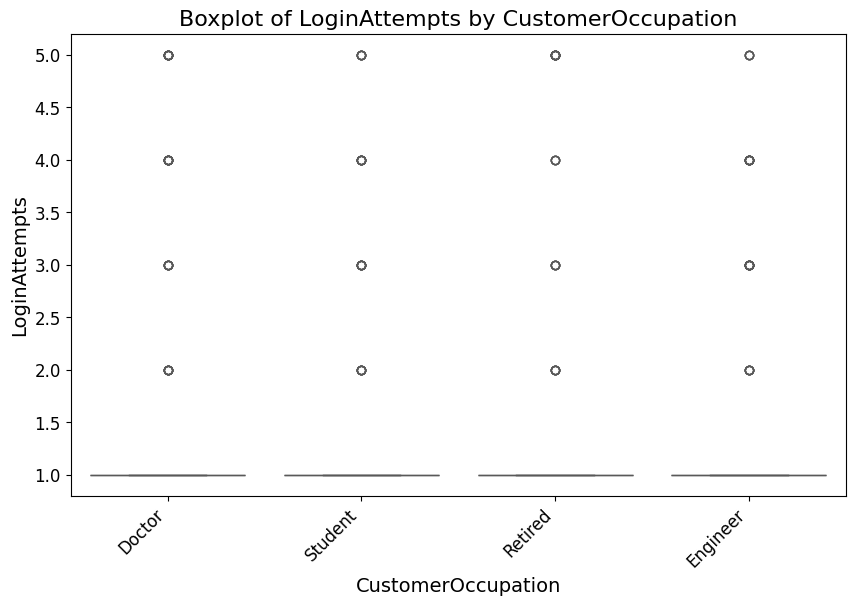

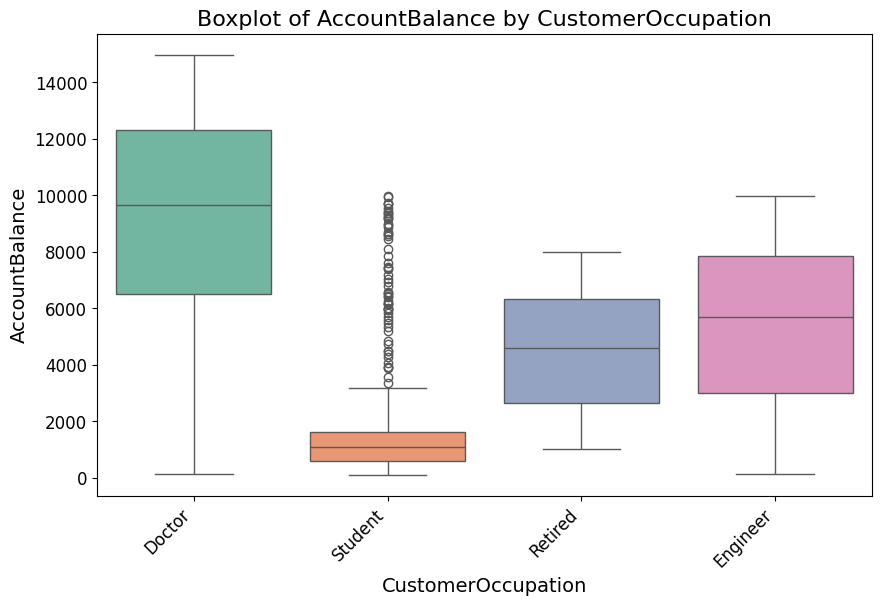

In [ ]:
# 3. Boxplot for Numeric vs Categorical
for cat_col in categorical_cols:
    for num_col in numeric_cols:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=cat_col, y=num_col, data=df, palette='Set2')
        plt.title(f'Boxplot of {num_col} by {cat_col}', fontsize=16)
        plt.xlabel(cat_col, fontsize=14)
        plt.ylabel(num_col, fontsize=14)
        plt.xticks(rotation=45, fontsize=12, ha='right')
        plt.yticks(fontsize=12)
        plt.show()

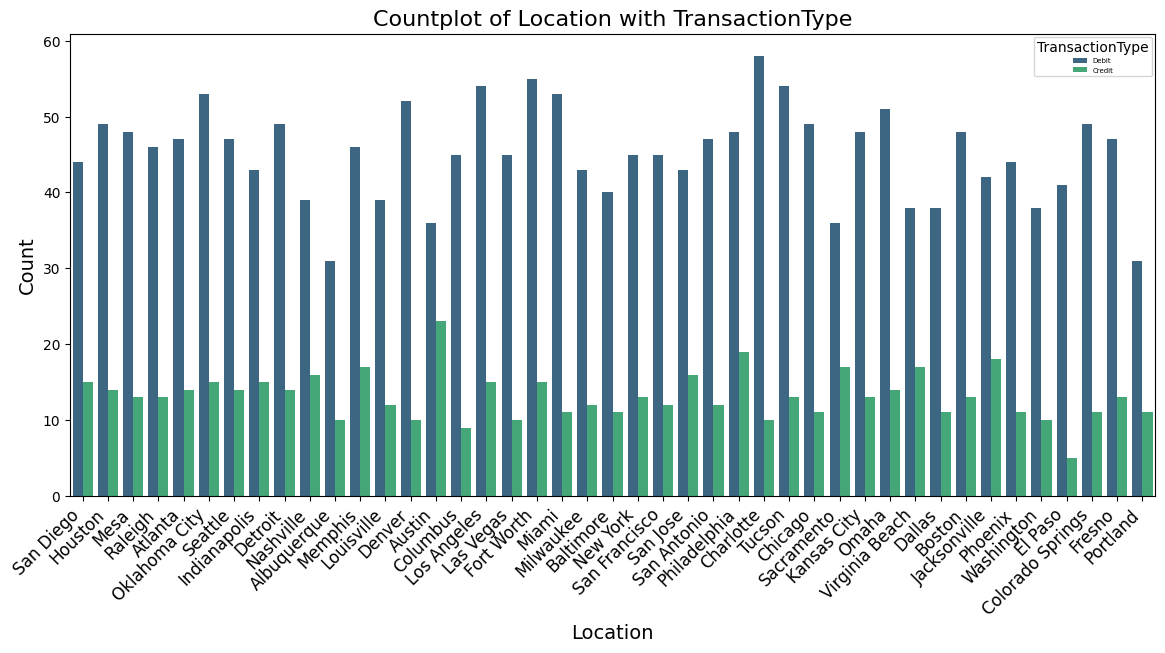

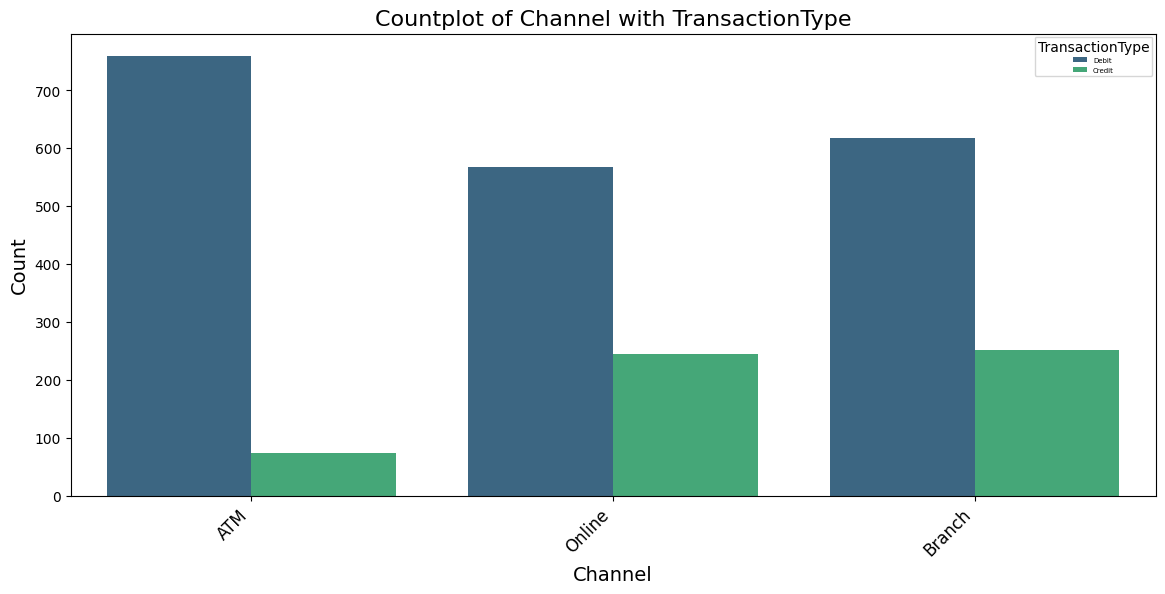

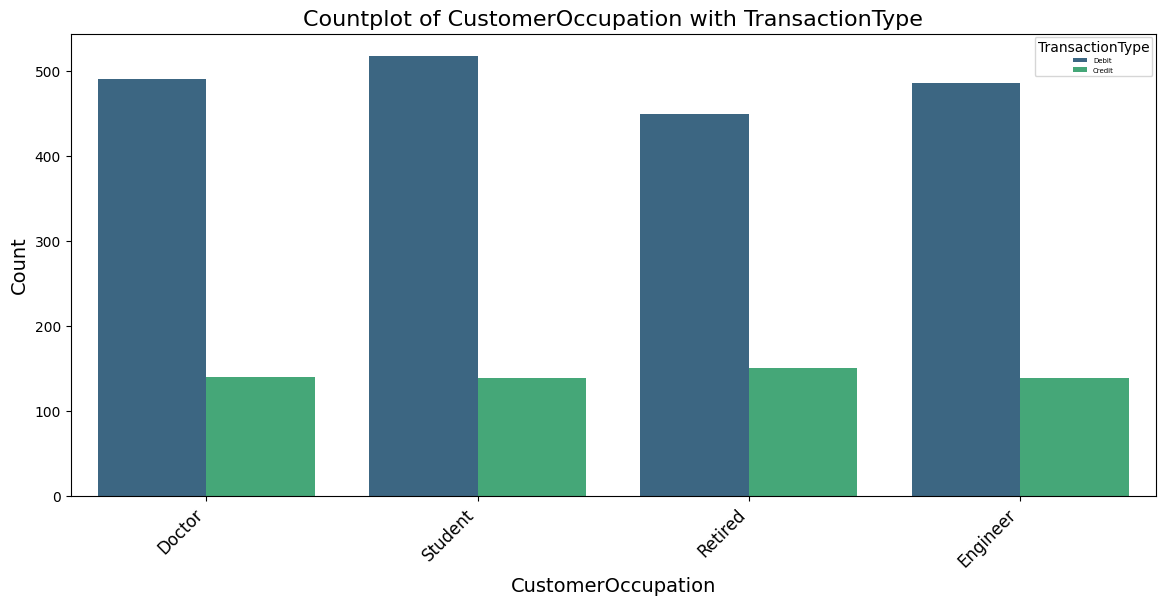

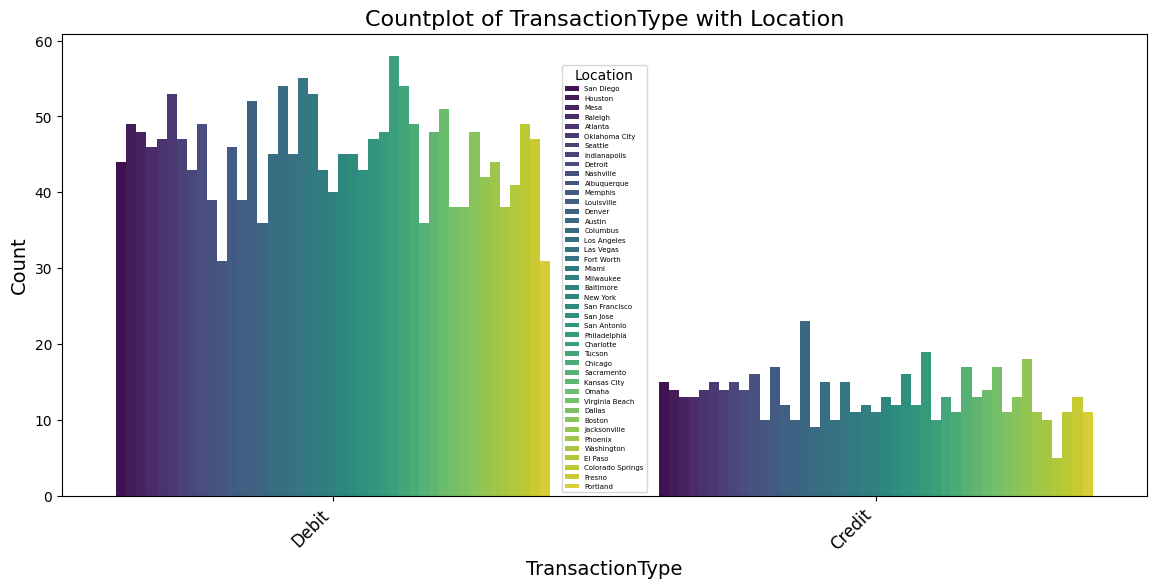

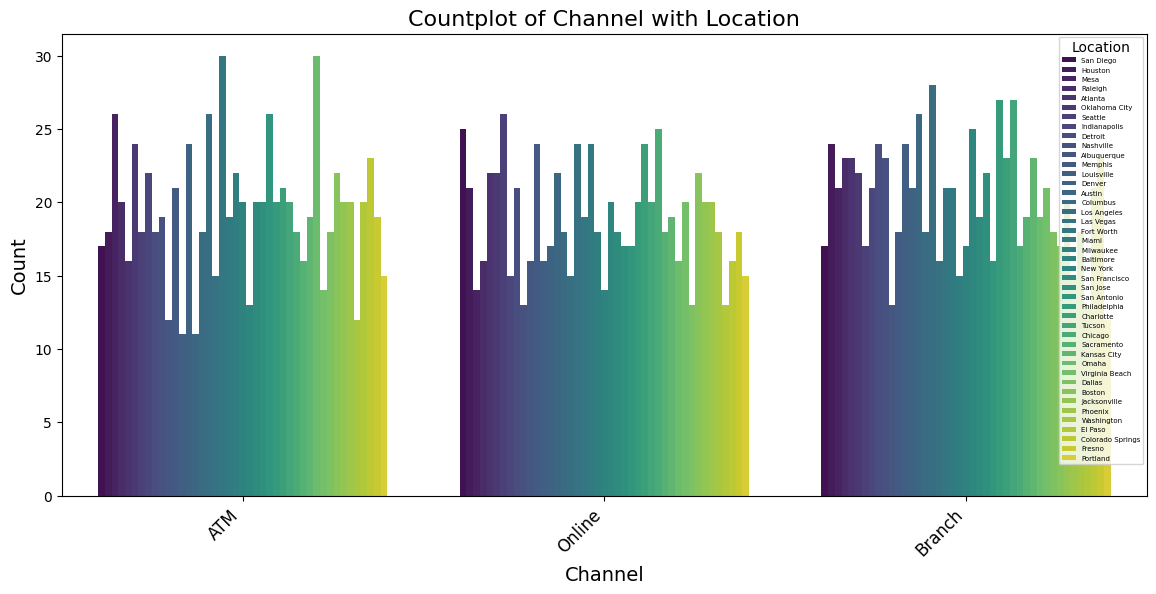

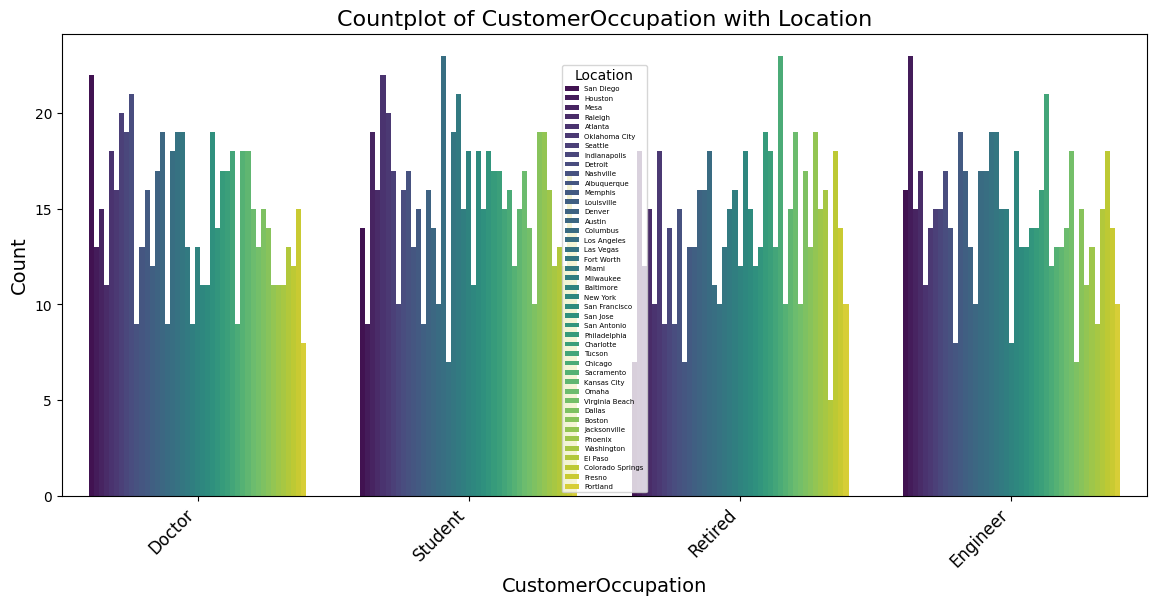

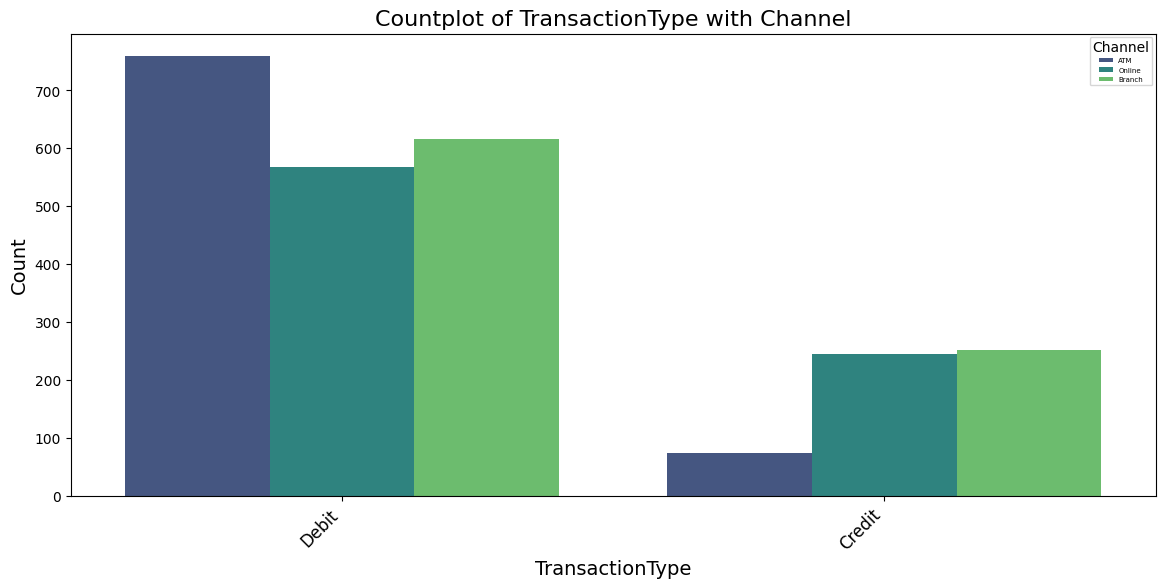

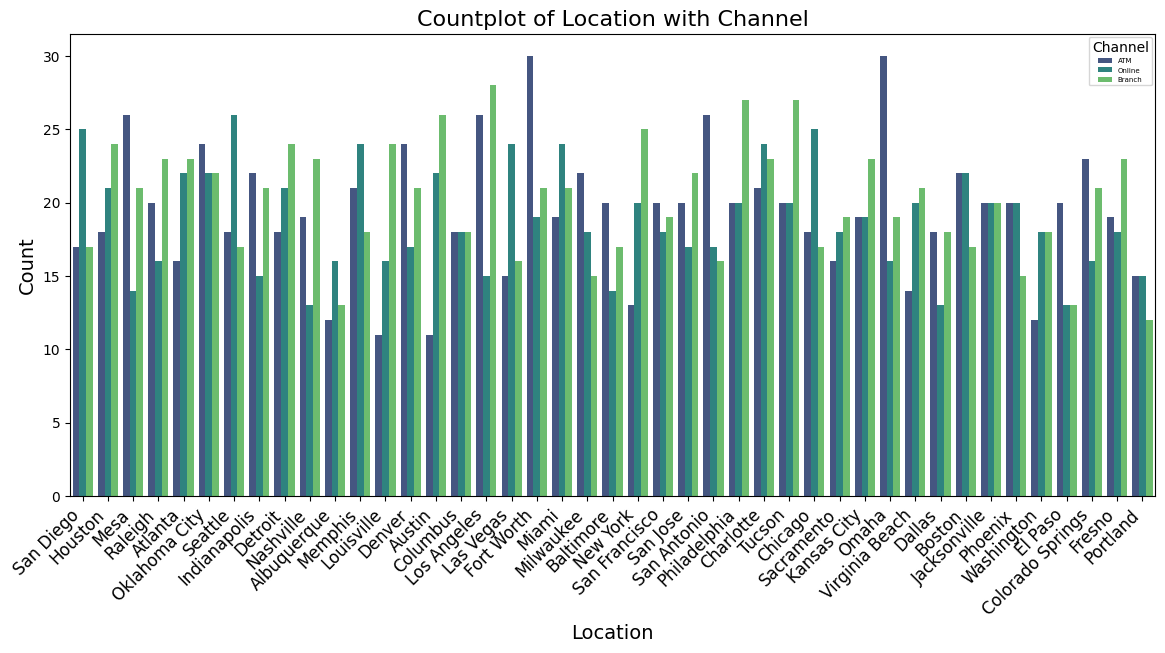

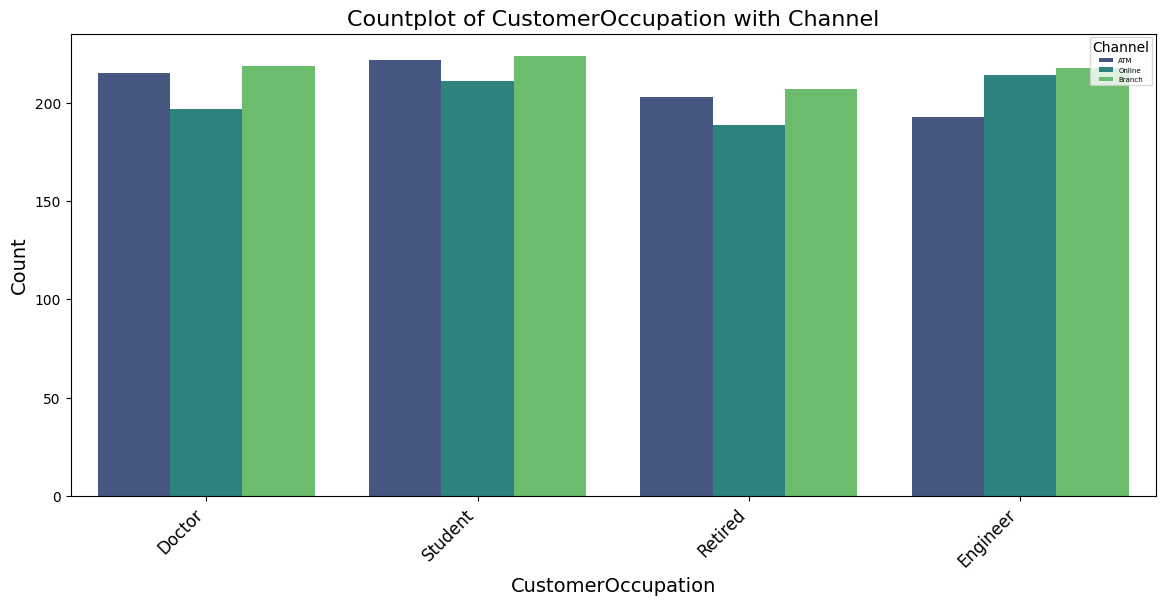

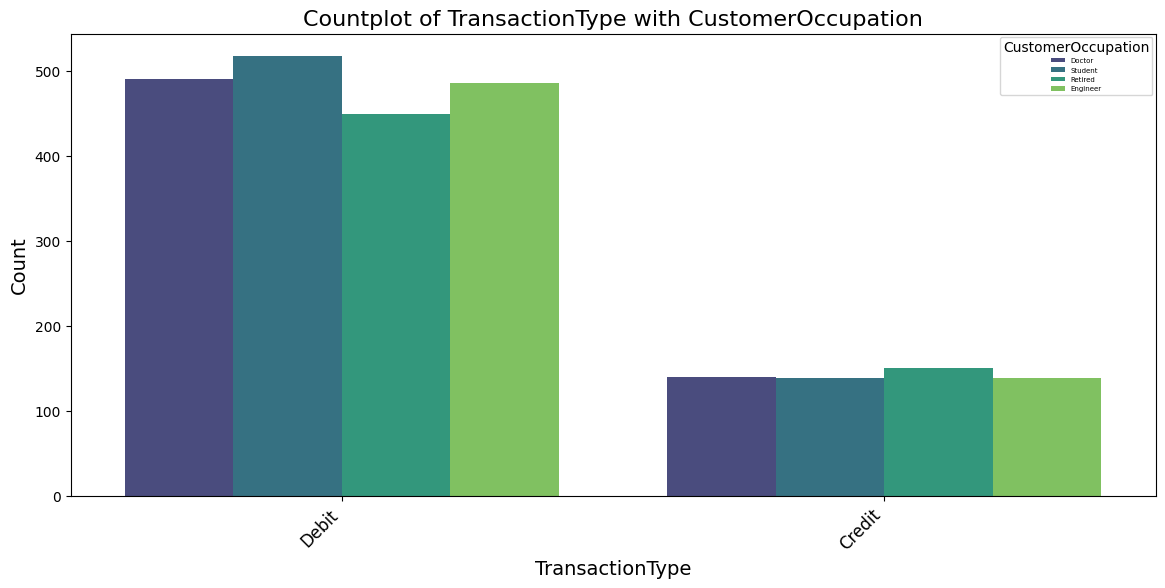

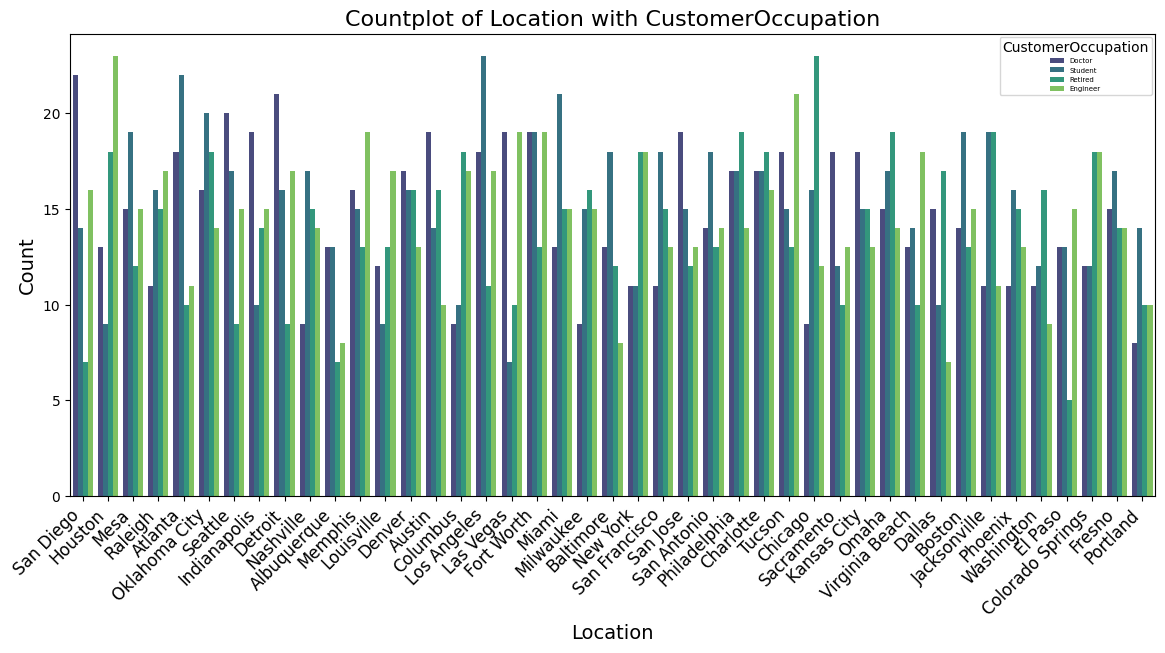

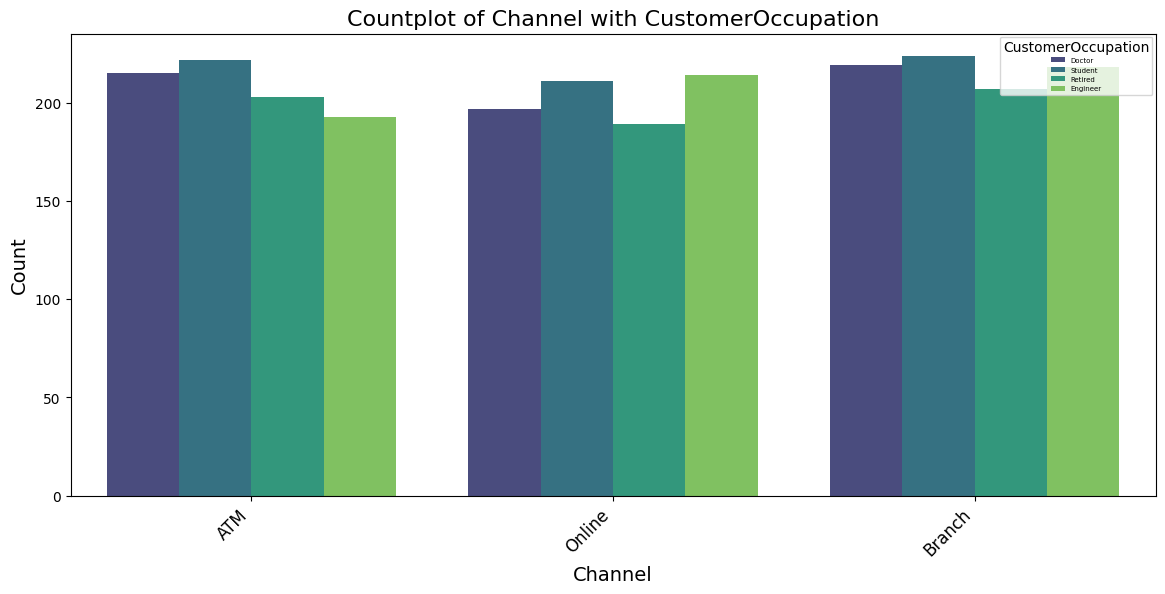

In [ ]:
# 4. Countplot with Hue for Categorical vs Categorical
for cat1 in categorical_cols:
    for cat2 in categorical_cols:
        if cat1 != cat2:  # Avoid self-comparison
            plt.figure(figsize=(14, 6))
            sns.countplot(x=cat2, hue=cat1, data=df, palette='viridis')
            plt.title(f'Countplot of {cat2} with {cat1}', fontsize=16)
            plt.xlabel(cat2, fontsize=14)
            plt.ylabel('Count', fontsize=14)
            plt.xticks(rotation=45, fontsize=12, ha='right')
            plt.legend(title=cat1, fontsize=5)
            plt.show()

# **3. Multivariate Analysis**

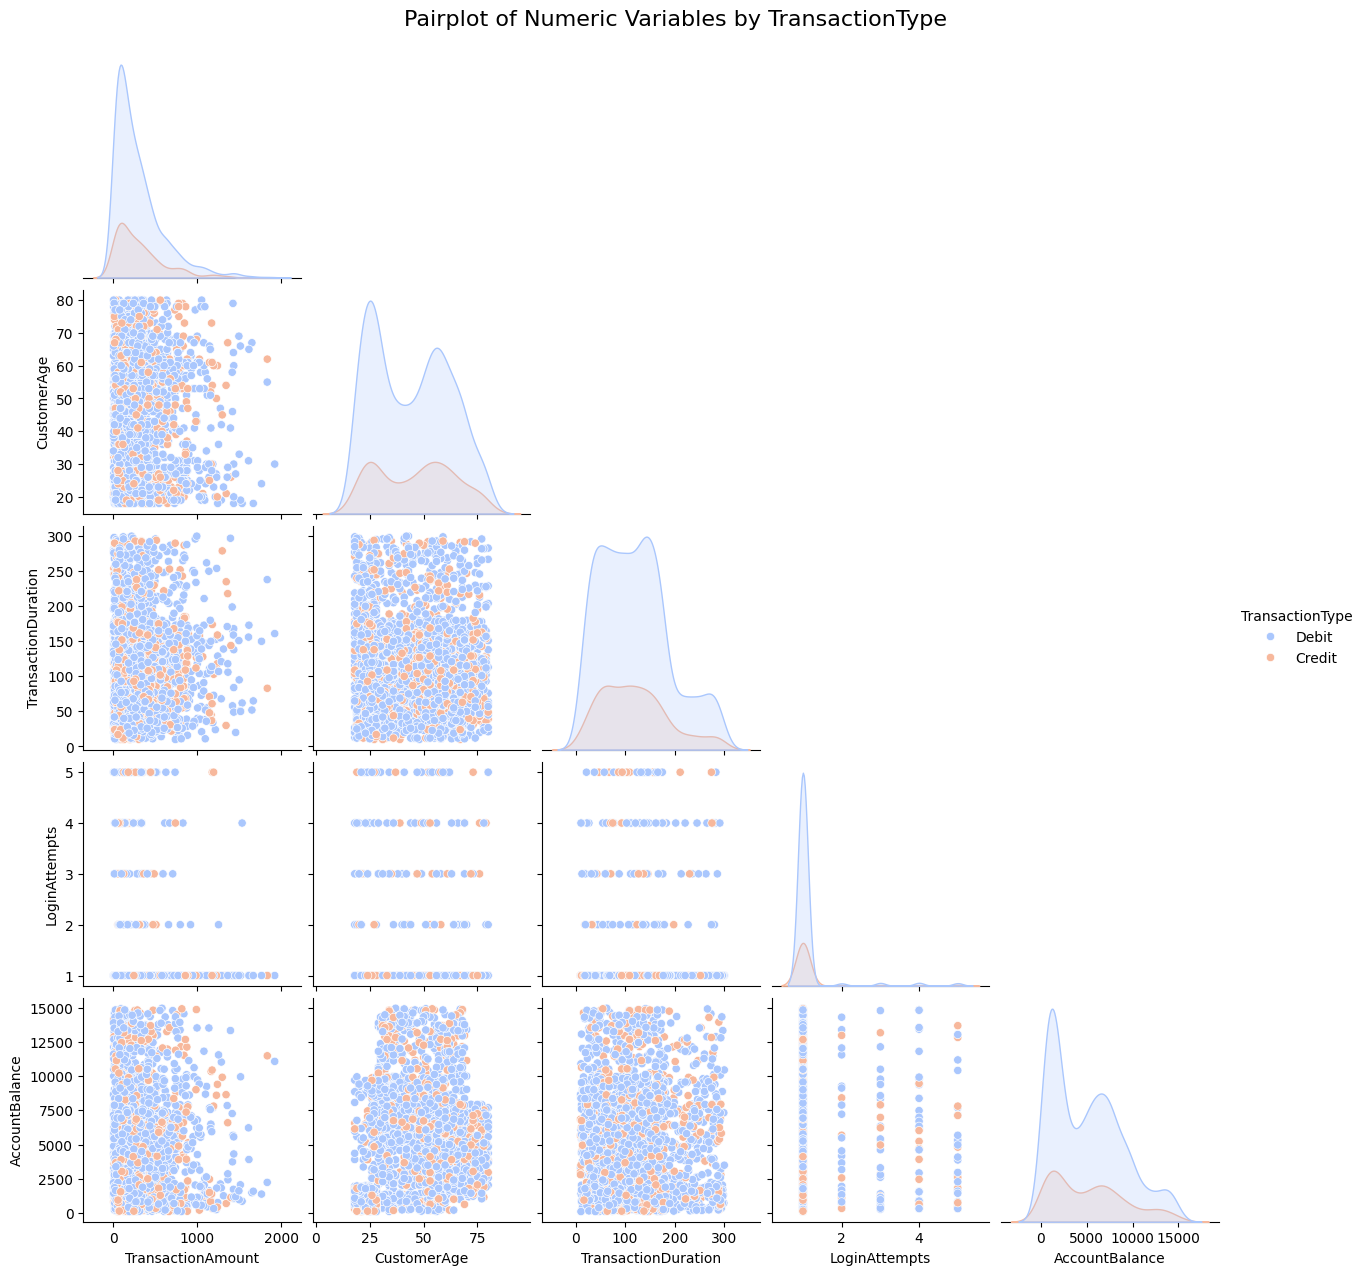

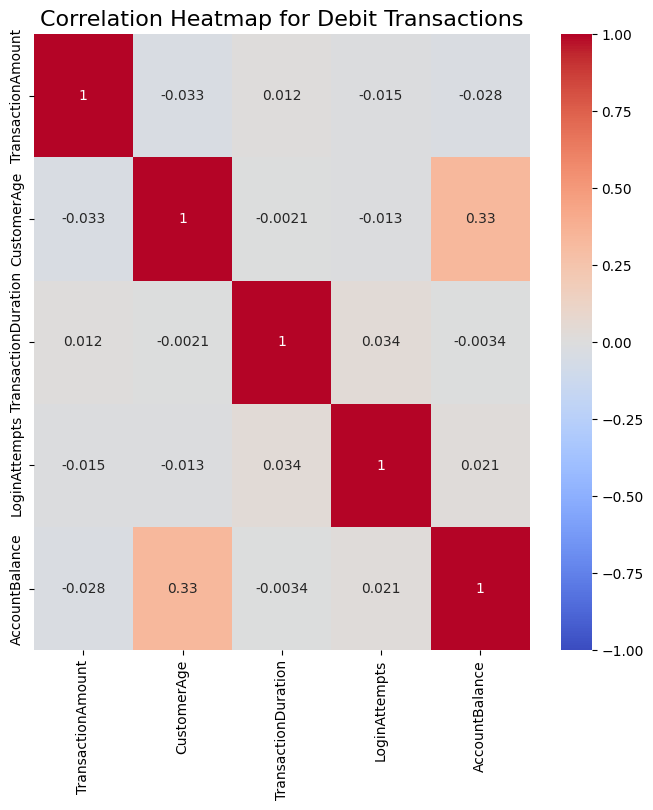

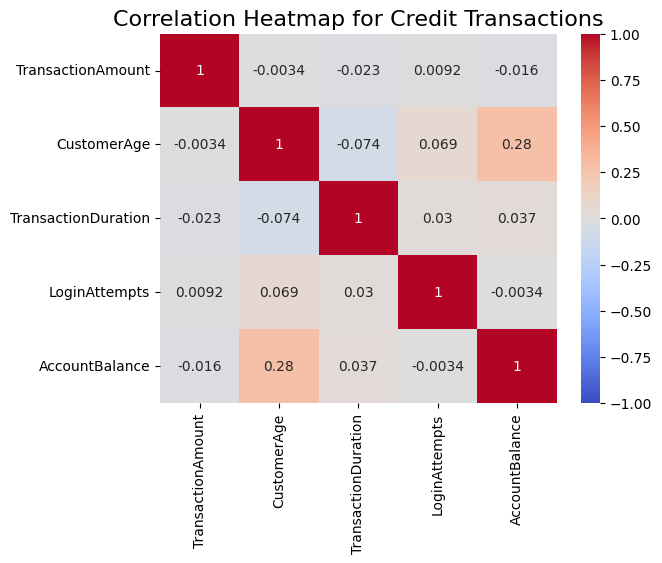

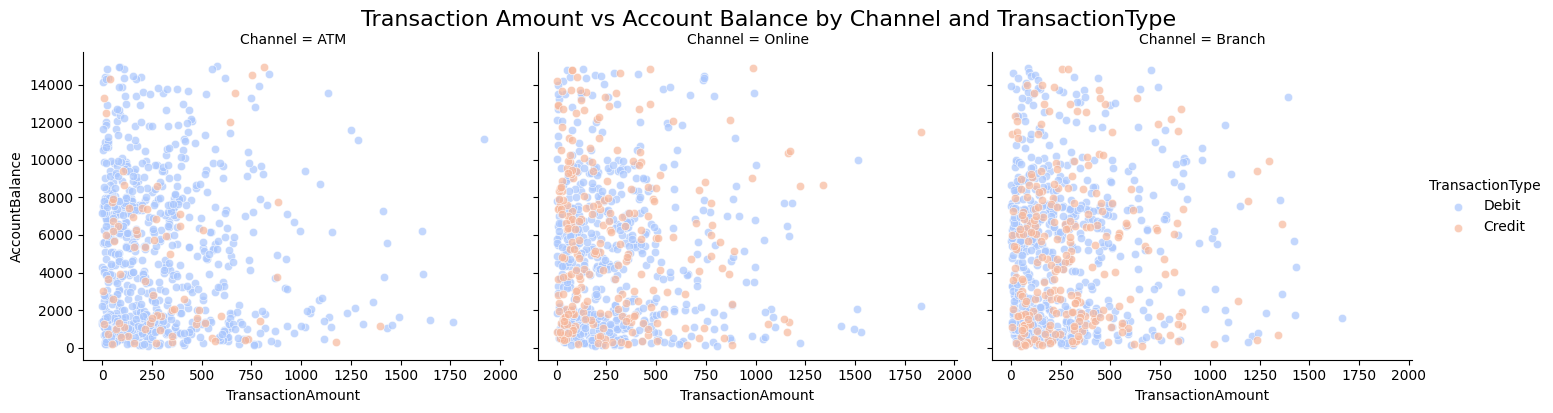

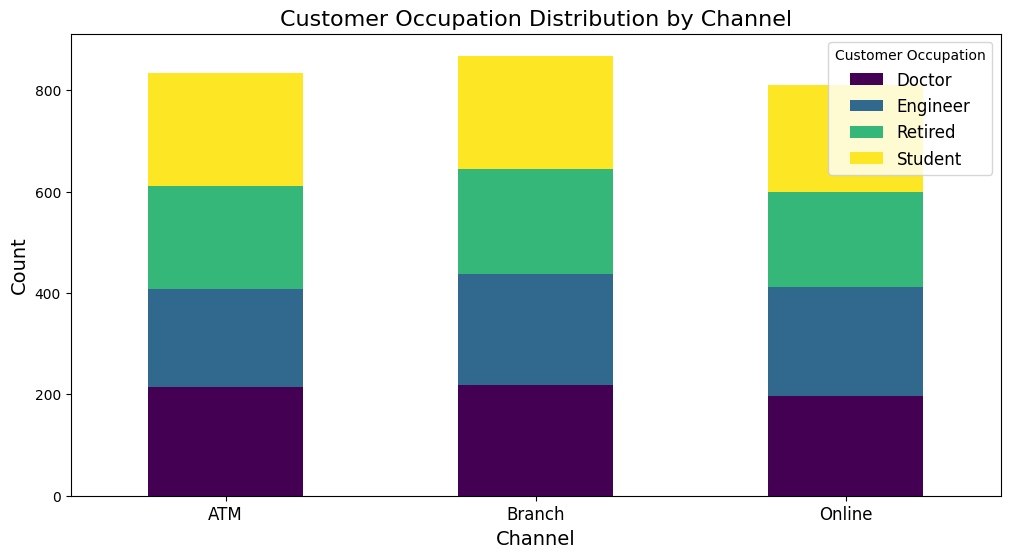

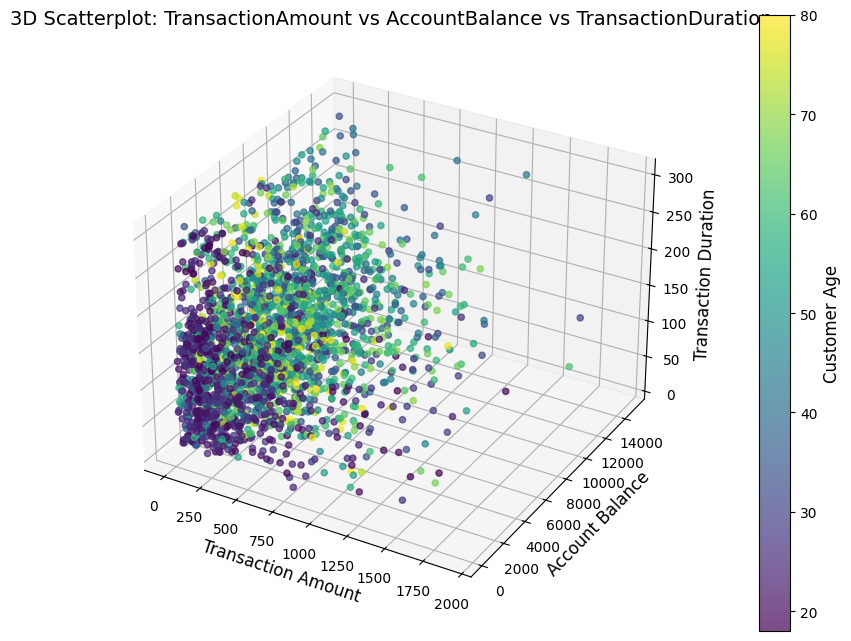

In [ ]:
# 1. Multivariate Pairplot (Numeric variables colored by a categorical variable)
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
sns.pairplot(df, vars=numeric_cols, hue='TransactionType', palette='coolwarm', corner=True, diag_kind='kde')
plt.suptitle('Pairplot of Numeric Variables by TransactionType', fontsize=16, y=1.02)
plt.show()

# 2. Heatmap of Numeric Correlations grouped by a Categorical Variable
plt.figure(figsize=(8, 8))
for trans_type in df['TransactionType'].unique():
    subset = df[df['TransactionType'] == trans_type]
    plt.title(f'Correlation Heatmap for {trans_type} Transactions', fontsize=16)
    sns.heatmap(subset[numeric_cols].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.show()

# 3. FacetGrid: Scatterplot of Transaction Amount vs Account Balance by Channel
g = sns.FacetGrid(df, col="Channel", hue="TransactionType", palette="coolwarm", height=4, aspect=1.2)
g.map(sns.scatterplot, "TransactionAmount", "AccountBalance", alpha=0.7)
g.add_legend()
g.fig.suptitle('Transaction Amount vs Account Balance by Channel and TransactionType', fontsize=16, y=1.02)
plt.show()

# 4. Stacked Bar Chart: Customer Occupation Distribution by Channel
occupation_channel = df.groupby(['Channel', 'CustomerOccupation']).size().unstack()
occupation_channel.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Customer Occupation Distribution by Channel', fontsize=16)
plt.xlabel('Channel', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.legend(title='Customer Occupation', fontsize=12)
plt.show()

# 5. 3D Scatterplot: Visualize three numeric variables

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    df['TransactionAmount'],
    df['AccountBalance'],
    df['TransactionDuration'],
    c=df['CustomerAge'],
    cmap='viridis',
    alpha=0.7
)
ax.set_xlabel('Transaction Amount', fontsize=12)
ax.set_ylabel('Account Balance', fontsize=12)
ax.set_zlabel('Transaction Duration', fontsize=12)
plt.title('3D Scatterplot: TransactionAmount vs AccountBalance vs TransactionDuration', fontsize=14)
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Customer Age', fontsize=12)
plt.show()

# **Fraud Detection Methods**

## **Preprocessing**

In [ ]:
#Importing Libararies
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LinearRegression
from scipy.stats import zscore
from scipy.cluster.hierarchy import linkage, fcluster
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
# Handle datetime columns
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'],format='%Y-%m-%d %H:%M:%S')
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'],format='%Y-%m-%d %H:%M:%S')
df['TimeSinceLastTransaction'] = (df['TransactionDate'] - df['PreviousTransactionDate']).dt.total_seconds()

In [ ]:
# Identify numeric and categorical columns
numeric_cols = ['TransactionAmount', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'CustomerAge', 'TimeSinceLastTransaction']
categorical_cols = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']

# Standardize numeric columns
scaler = StandardScaler()
numeric_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=numeric_cols)

# One-hot encode categorical columns
encoder = OneHotEncoder(sparse_output=False, drop='first')
categorical_encoded = pd.DataFrame(encoder.fit_transform(df[categorical_cols]),
                                   columns=encoder.get_feature_names_out(categorical_cols))
# Combine preprocessed data
processed_data = pd.concat([numeric_scaled, categorical_encoded], axis=1)

# Descriptive Statistics
print("Descriptive Statistics:")
print(df[numeric_cols].describe())

# Initialize Fraud column
df['Fraud'] = False

Descriptive Statistics:
       TransactionAmount  TransactionDuration  LoginAttempts  AccountBalance  \
count        2512.000000          2512.000000    2512.000000     2512.000000   
mean          297.593778           119.643312       1.124602     5114.302966   
std           291.946243            69.963757       0.602662     3900.942499   
min             0.260000            10.000000       1.000000      101.250000   
25%            81.885000            63.000000       1.000000     1504.370000   
50%           211.140000           112.500000       1.000000     4735.510000   
75%           414.527500           161.000000       1.000000     7678.820000   
max          1919.110000           300.000000       5.000000    14977.990000   

       CustomerAge  TimeSinceLastTransaction  
count  2512.000000              2.512000e+03  
mean     44.673965             -4.211863e+07  
std      17.792198              9.191205e+06  
min      18.000000             -5.803267e+07  
25%      27.000000  



---


# **1. K-Means Custering**


---



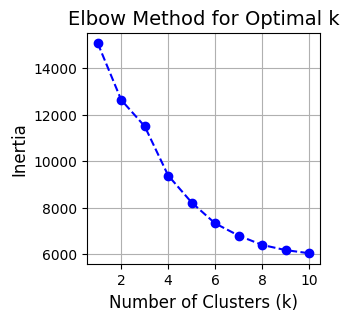

In [ ]:
# List to store inertia for each k
inertia_values = []

# Range of k values to try
k_range = range(1, 11)

# Calculate inertia for each k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(numeric_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(3, 3))
plt.plot(k_range, inertia_values, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.title('Elbow Method for Optimal k', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid()
plt.savefig("ep")
plt.show()

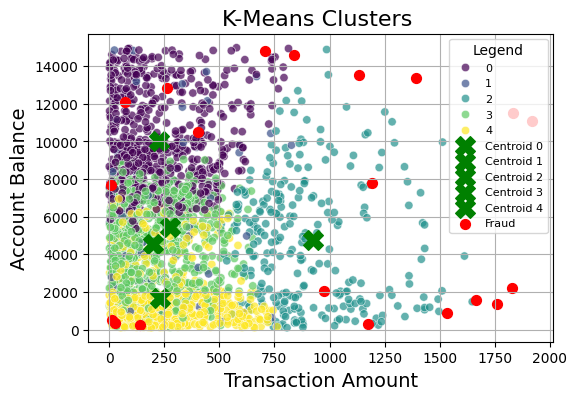

Total Fraudulent Transactions Detected (Using K Means clustering): 20
Fraudulent transactions saved to: kmeans_fraud_transactions.csv


In [ ]:
# Identify numeric columns
numeric_cols = ['TransactionAmount', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'CustomerAge']

# Standardize numeric columns for clustering
scaler = StandardScaler()
numeric_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=numeric_cols)

# Perform K-Means clustering
kmeans = KMeans(n_init='auto')
kmeans.fit(numeric_scaled)
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(numeric_scaled)
df['KMeans_Cluster'] = kmeans_labels

# Calculate distances from centroids
centroids = kmeans.cluster_centers_
distances = np.linalg.norm(numeric_scaled.values - centroids[kmeans_labels], axis=1)
df['KMeans_Distance'] = distances

# Set threshold: Mean + 3 * Standard Deviation
threshold = distances.mean() + 3 * distances.std()
df['KMeans_Fraud'] = distances > threshold

# Summary of flagged anomalies
fraud_summary = df['KMeans_Fraud'].value_counts()
threshold, fraud_summary, df[['TransactionAmount', 'KMeans_Distance', 'KMeans_Fraud']].head()


# Calculate centroids and scale them back to the original feature space
centroids_scaled = kmeans.cluster_centers_
centroids_original = scaler.inverse_transform(centroids_scaled)

# Add a fraud detection logic (using distance from centroids)
distances = np.linalg.norm(numeric_scaled - centroids_scaled[kmeans_labels], axis=1)
threshold = distances.mean() + 3 * distances.std()
df['Fraud'] = distances > threshold
df['KMeans_Distance'] = distances

# Scatterplot for two features with clusters
plt.figure(figsize=(6, 4))
sns.scatterplot(
    x=df['TransactionAmount'],
    y=df['AccountBalance'],
    hue=df['KMeans_Cluster'],
    palette='viridis',
    alpha=0.7,
    legend='full'
    )

# Overlay centroids on the scatterplot
for i, centroid in enumerate(centroids_original):
    plt.scatter(
        centroid[numeric_cols.index('TransactionAmount')],
        centroid[numeric_cols.index('AccountBalance')],
        color='green',
        marker='X',
        s=200,
        label=f'Centroid {i}'
    )

# Highlight fraud points
fraud_points = df[df['Fraud']]
plt.scatter(
    fraud_points['TransactionAmount'],
    fraud_points['AccountBalance'],
    color='red',
    marker='o',
    s=50,
    label='Fraud'
)

plt.title('K-Means Clusters ', fontsize=16)
plt.xlabel('Transaction Amount', fontsize=14)
plt.ylabel('Account Balance', fontsize=14)
plt.legend(title='Legend', fontsize=8)
plt.grid(True)
plt.show()
# Save fraud transactions to a separate CSV file
fraud_output_path = 'kmeans_fraud_transactions.csv'
fraud_points.to_csv(fraud_output_path, index=False)

# Print summary of fraud points
total_fraud_points = df['Fraud'].sum()
print(f"Total Fraudulent Transactions Detected (Using K Means clustering): {total_fraud_points}")
print(f"Fraudulent transactions saved to: {fraud_output_path}")

# **2. DBSCAN Analysis**

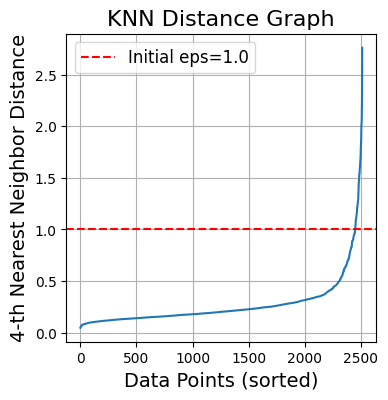

In [ ]:
from sklearn.neighbors import NearestNeighbors

# Define the value of k (min_samples - 1)
k = 4  # If min_samples=5, k = min_samples - 1

# Fit Nearest Neighbors model
nbrs = NearestNeighbors(n_neighbors=k).fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)

# Sort distances to the k-th nearest neighbor
k_distances = np.sort(distances[:, k-1])

# Plot the k-distance graph
plt.figure(figsize=(4,4))
plt.plot(k_distances)
plt.axhline(y=1.0, color='r', linestyle='--', label='Initial eps=1.0')
plt.title('KNN Distance Graph', fontsize=16)
plt.xlabel('Data Points (sorted)', fontsize=14)
plt.ylabel(f'{k}-th Nearest Neighbor Distance', fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

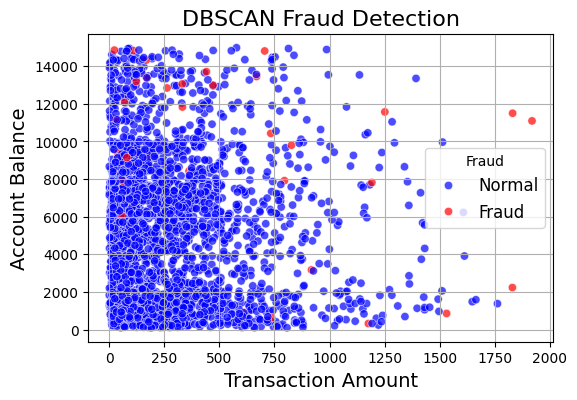

Total Fraudulent Transactions Detected by DBSCAN: 40
Fraudulent transactions saved to: dbscan_fraud_transactions.csv
Silhouette Score (eps=1.2): 0.16395683548204


In [ ]:
from sklearn.cluster import DBSCAN

# Define features for DBSCAN clustering
features = ['TransactionAmount', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
X = df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=1.2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
df['DBSCAN_Cluster'] = dbscan_labels

# Flag fraud points (noise points are labeled -1)
df['DBSCAN_Fraud'] = df['DBSCAN_Cluster'] == -1

# Extract fraudulent transactions
dbscan_fraud_points = df[df['DBSCAN_Fraud']]

# Summary of results
total_dbscan_fraud_points = df['DBSCAN_Fraud'].sum()
dbscan_fraud_points_summary = dbscan_fraud_points[['TransactionAmount', 'TransactionDuration', 'AccountBalance', 'DBSCAN_Fraud']]

# Mark noise points in Fraud column
df['Fraud'] |= df['DBSCAN_Fraud']
# Scatterplot for DBSCAN fraud detection
plt.figure(figsize=(6, 4))
sns.scatterplot(
    x=df['TransactionAmount'],
    y=df['AccountBalance'],
    hue=df['DBSCAN_Fraud'],
    palette={True: 'red', False: 'blue'},
    alpha=0.7
)
plt.title('DBSCAN Fraud Detection', fontsize=16)
plt.xlabel('Transaction Amount', fontsize=14)
plt.ylabel('Account Balance', fontsize=14)
handles, labels = plt.gca().get_legend_handles_labels()
custom_labels = ['Normal', 'Fraud']
plt.legend(handles, custom_labels, title='Fraud', fontsize=12)
plt.grid(True)
plt.show()

# Save fraudulent transactions detected by DBSCAN
dbscan_fraud_output_path = 'dbscan_fraud_transactions.csv'
dbscan_fraud_points.to_csv(dbscan_fraud_output_path, index=False)
# Summary
print(f"Total Fraudulent Transactions Detected by DBSCAN: {total_dbscan_fraud_points}")
print(f"Fraudulent transactions saved to: {dbscan_fraud_output_path}")
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_scaled, dbscan_labels)
print(f'Silhouette Score (eps=1.2): {silhouette_avg}')




---


# **2. Z-Score Analysis**


---



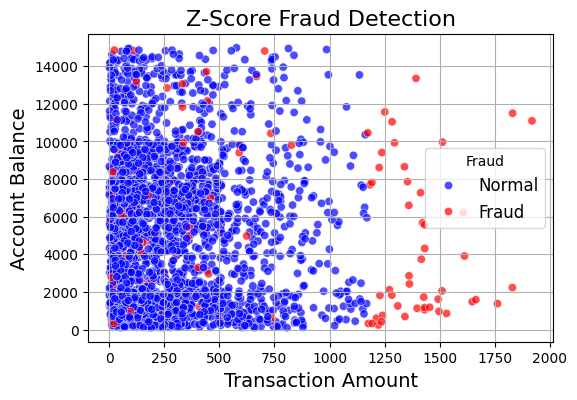

Total Fraudulent Transactions Detected by Z-Score Analysis: 140


In [ ]:
from scipy.stats import zscore

# Define numeric columns
numeric_cols = ['TransactionAmount', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'CustomerAge']

# Calculate Z-Scores
z_scores = np.abs(zscore(df[numeric_cols]))
df['ZScore_Fraud'] = (z_scores > 3).any(axis=1)

# Extract fraudulent transactions
zscore_fraud_points = df[df['ZScore_Fraud']]

# Summary of results
total_zscore_fraud_points = df['ZScore_Fraud'].sum()
zscore_fraud_points_summary = zscore_fraud_points[numeric_cols + ['ZScore_Fraud']]

# Adding True values to Fraud column
df['Fraud'] |= df['ZScore_Fraud']

# Scatterplot for Z-Score fraud detection
plt.figure(figsize=(6,4))
sns.scatterplot(
    x=df['TransactionAmount'],
    y=df['AccountBalance'],
    hue=df['ZScore_Fraud'],
    palette={True: 'red', False: 'blue'},
    alpha=0.7
)
plt.title('Z-Score Fraud Detection', fontsize=16)
plt.xlabel('Transaction Amount', fontsize=14)
plt.ylabel('Account Balance', fontsize=14)
handles, labels = plt.gca().get_legend_handles_labels()
custom_labels = ['Normal', 'Fraud']
plt.legend(handles, custom_labels, title='Fraud', fontsize=12)
plt.grid(True)
plt.show()

# Save fraud transactions to a new CSV
fraud_transactions = df[df['ZScore_Fraud']]
fraud_transactions.to_csv('fraud_transactions_zscore.csv', index=False)

# Summary
print(f"Total Fraudulent Transactions Detected by Z-Score Analysis: {total_zscore_fraud_points}")



---


# **3. Isolation Forest**


---



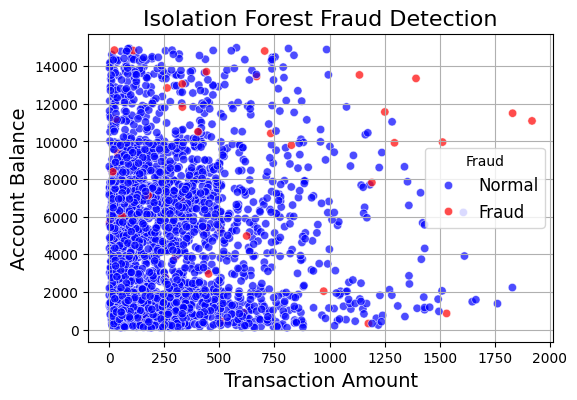

Total Fraudulent Transactions Detected (using isolation forest): 51
Fraudulent transactions saved as 'iso_fraud_transactions.csv'


In [ ]:
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Apply Isolation Forest
iso_forest = IsolationForest(contamination=0.02, random_state=42)  # 2% expected anomalies
iso_forest.fit(numeric_scaled)  # Fit on the scaled numeric data

# Predict anomalies
df['IsoForest_Score'] = iso_forest.decision_function(numeric_scaled)
df['IsoForest_Fraud'] = iso_forest.predict(numeric_scaled) == -1  # Mark anomalies (-1) as fraud

# Extract fraudulent transactions
iso_fraud_points = df[df['IsoForest_Fraud']]
# Summary of Isolation Forest results
total_iso_fraud_points = df['IsoForest_Fraud'].sum()
iso_fraud_points_summary = iso_fraud_points[['TransactionAmount', 'TransactionDuration', 'AccountBalance', 'IsoForest_Fraud']]

# Adding True values to Fraud column
df['Fraud'] |= df['IsoForest_Fraud']

# Scatterplot to visualize fraud points
plt.figure(figsize=(6,4))
sns.scatterplot(
    x=df['TransactionAmount'],
    y=df['AccountBalance'],
    hue=df['IsoForest_Fraud'],
    palette={True: 'red', False: 'blue'},
    alpha=0.7
)
plt.title('Isolation Forest Fraud Detection', fontsize=16)
plt.xlabel('Transaction Amount', fontsize=14)
plt.ylabel('Account Balance', fontsize=14)
handles, labels = plt.gca().get_legend_handles_labels()
custom_labels = ['Normal', 'Fraud']
plt.legend(handles, custom_labels, title='Fraud', fontsize=12)
plt.grid(True)
plt.show()

# Outputs
total_iso_fraud_points, iso_fraud_points_summary.head(), iso_fraud_points_summary.shape
print(f"Total Fraudulent Transactions Detected (using isolation forest): {total_iso_fraud_points}")

# Filter only fraudulent transactions
fraud_transactions = df[df['IsoForest_Fraud']]

# Save the fraud transactions to a CSV file
fraud_transactions.to_csv('ISO_fraud_transactions.csv', index=False)

print("Fraudulent transactions saved as 'iso_fraud_transactions.csv'")




---


# **5. Logistic Regression**


---



Classification Report:
              precision    recall  f1-score   support

       False       0.99      1.00      1.00       711
        True       1.00      0.88      0.94        43

    accuracy                           0.99       754
   macro avg       1.00      0.94      0.97       754
weighted avg       0.99      0.99      0.99       754



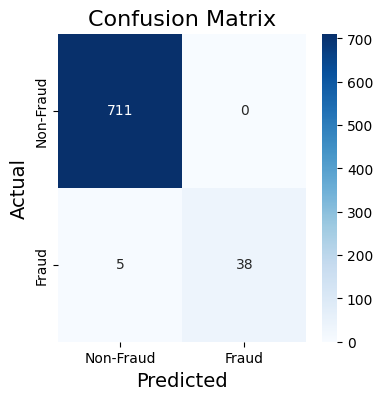

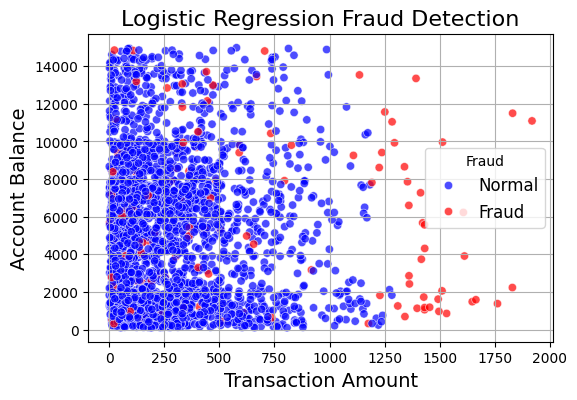

Total Fraudulent Transactions Detected by Logistic Regression: 139
Fraudulent transactions saved to: log_reg_fraud_transactions.csv


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Define relevant columns for logistic regression
features = ['TransactionAmount', 'TransactionDuration', 'LoginAttempts', 'AccountBalance','CustomerAge','TimeSinceLastTransaction']
target = 'Fraud'

# Prepare the dataset
X = df[features]
y = df[target]
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Predict fraud on the test set
y_pred = log_reg.predict(X_test)


# Evaluate model performance
print("Classification Report:")
print(classification_report(y_test, y_pred))
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show()

# Add predictions to the dataset
df['LogReg_Fraud'] = log_reg.predict(X_scaled)
df['Fraud'] |= df['LogReg_Fraud']
# Visualize fraud vs. non-fraud transactions
plt.figure(figsize=(6,4))
sns.scatterplot(
    x=df['TransactionAmount'],
    y=df['AccountBalance'],
    hue=df['LogReg_Fraud'],
    palette={1: 'red', 0: 'blue'},
    alpha=0.7
)
plt.title('Logistic Regression Fraud Detection', fontsize=16)
plt.xlabel('Transaction Amount', fontsize=14)
plt.ylabel('Account Balance', fontsize=14)
handles, labels = plt.gca().get_legend_handles_labels()
custom_labels = ['Normal', 'Fraud']
plt.legend(handles, custom_labels, title='Fraud', fontsize=12)
plt.grid(True)
plt.show()

# Save fraudulent transactions detected by Logistic Regression
log_reg_fraud_output_path = 'log_reg_fraud_transactions.csv'
log_reg_fraud_points = df[df['LogReg_Fraud'] == 1]
log_reg_fraud_points.to_csv(log_reg_fraud_output_path, index=False)

# Summary
total_log_reg_fraud_points = log_reg_fraud_points.shape[0]
print(f"Total Fraudulent Transactions Detected by Logistic Regression: {total_log_reg_fraud_points}")
print(f"Fraudulent transactions saved to: {log_reg_fraud_output_path}")



---


# **Consolidated Fraud Analysis**


---




Total Fraudulent Transactions Detected: 157


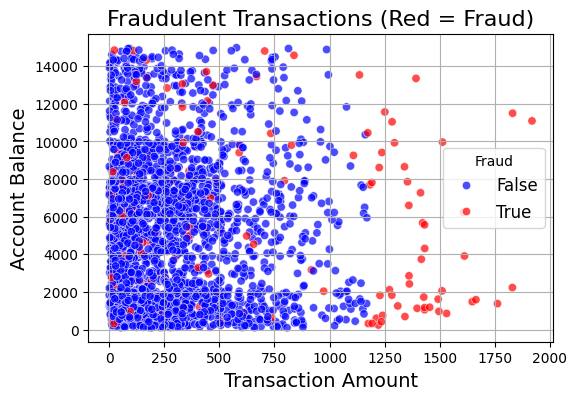

Results saved to fraud_detection_results.csv


In [ ]:
# Summary of fraud detection results
print(f"Total Fraudulent Transactions Detected: {df['Fraud'].sum()}")

# Visualize fraudulent transactions
plt.figure(figsize=(6, 4))
sns.scatterplot(
    x='TransactionAmount',
    y='AccountBalance',
    hue='Fraud',
    data=df,
    palette={True: 'red', False: 'blue'},
    alpha=0.7
)
plt.title('Fraudulent Transactions (Red = Fraud)', fontsize=16)
plt.xlabel('Transaction Amount', fontsize=14)
plt.ylabel('Account Balance', fontsize=14)
plt.legend(title='Fraud', fontsize=12)
plt.grid(True)
plt.show()

# Save the results to a CSV file
output_path = 'fraud_detection_results.csv'
df.to_csv(output_path, index=False)
print(f"Results saved to {output_path}")

# Filter the DataFrame for rows where 'Fraud' is True
fraud_rows = df[df['Fraud'] == True]


In [ ]:
# Identify boolean columns
boolean_columns = fraud_rows.select_dtypes(include=['bool']).columns
fraud_rows = fraud_rows.copy()

# Count the number of True values per row
fraud_rows['Threat_Level'] = fraud_rows[boolean_columns].sum(axis=1)-1

# Sort rows by the count of True values in descending order
sorted_data = fraud_rows.sort_values(by='Threat_Level', ascending=False)

# Save the sorted data to a new CSV file
output_path = 'potential_fraudulent_transactions.csv'
sorted_data.to_csv(output_path, index=False)
print(f"Sorted data saved to {output_path}")

# Load the dataset
fraud_file_path = 'potential_fraudulent_transactions.csv'
fr = pd.read_csv(fraud_file_path)
# Display the top rows
print("Top rows with the most True values:")
print(sorted_data.head())

Sorted data saved to potential_fraudulent_transactions.csv
Top rows with the most True values:
     TransactionID AccountID  TransactionAmount     TransactionDate  \
274       TX000275   AC00454            1176.28 2023-12-20 16:08:02   
1213      TX001214   AC00170            1192.20 2023-12-21 16:21:27   
1438      TX001439   AC00179            1831.02 2023-09-15 17:31:42   
1557      TX001558   AC00245             262.43 2023-06-13 17:26:54   
394       TX000395   AC00326               6.30 2023-12-14 18:52:54   

     TransactionType      Location DeviceID     IP Address MerchantID Channel  \
274           Credit   Kansas City  D000476    50.202.8.53       M074     ATM   
1213          Credit  Jacksonville  D000174   40.10.25.102       M093  Branch   
1438          Credit      Columbus  D000246  141.121.30.32       M012  Online   
1557          Credit     San Diego  D000365  172.184.35.29       M046  Online   
394            Debit      Columbus  D000539  210.160.90.52       M017  Br

In [ ]:
# Count occurrences of each AccountID
accountid_counts = fr['AccountID'].value_counts()

# Find the most repeated AccountID(s)
most_repeated_accountid = accountid_counts.idxmax()
max_count = accountid_counts.max()

# Display the top repeated AccountID(s)
print(f"The most repeated AccountID is: {most_repeated_accountid} with {max_count} occurrences.")

# Display the top 5 most repeated AccountIDs
print("Top 5 most repeated AccountIDs:")
print(accountid_counts.head(10))

The most repeated AccountID is: AC00358 with 3 occurrences.
Top 5 most repeated AccountIDs:
AccountID
AC00358    3
AC00071    3
AC00385    2
AC00316    2
AC00098    2
AC00460    2
AC00272    2
AC00200    2
AC00456    2
AC00418    2
Name: count, dtype: int64


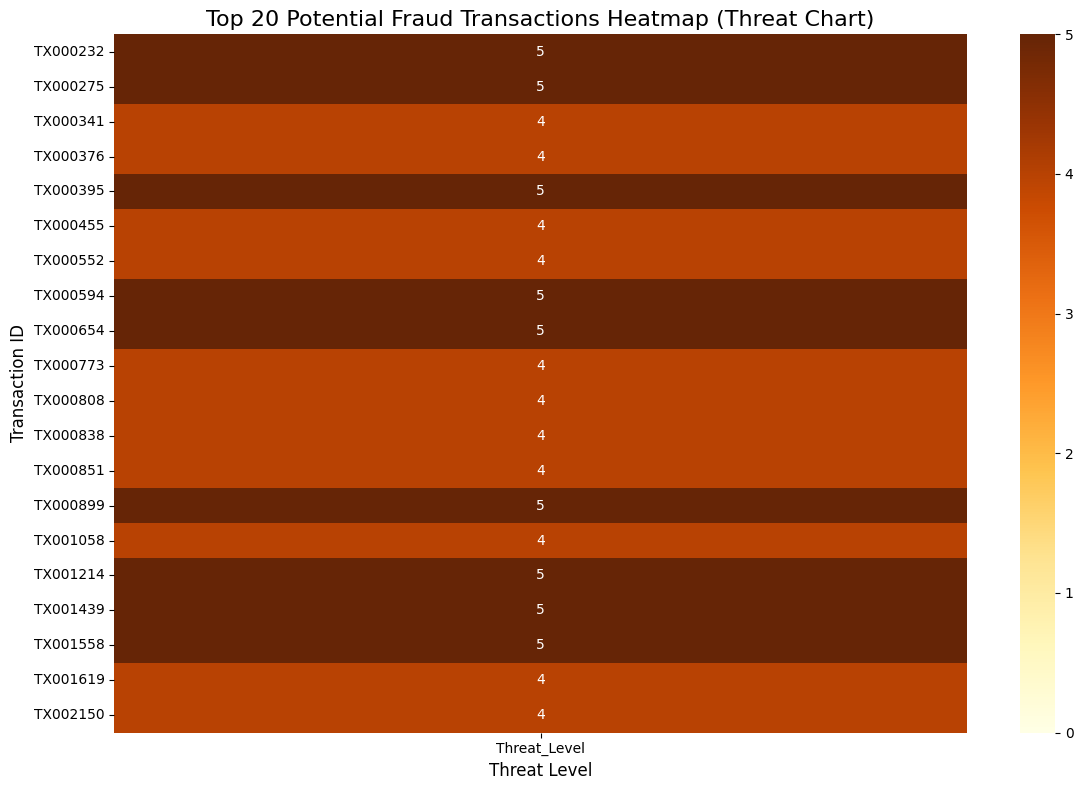

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select the top 20 rows
top_20_data = fr.head(20)

# Pivot table for heatmap
heatmap_data = top_20_data.pivot_table(
    index='TransactionID',
    values='Threat_Level'
)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    cmap="YlOrBr",
    vmin=0,
    vmax=5,
    cbar=True
)

# Add labels and title
plt.title("Top 20 Potential Fraud Transactions Heatmap (Threat Chart)", fontsize=16)
plt.xlabel("Threat Level", fontsize=12)
plt.ylabel("Transaction ID", fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()